# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [I Gusti Arya Aditya Dharma]
- **Email:** [mc179d5y0615@student.devacademy.id]
- **ID Dicoding:** [MC179D5Y0615]

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan kualitas udara di berbagai kota atau distrik dari tahun 2013 hingga 2017?
- Pada jam atau hari apa kualitas udara paling buruk di masing-masing kota atau distrik?
- Apakah ada perbedaan tren polusi antara siang dan malam di masing-masing kota atau distrik?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [2]:
df_Aotizhongxin = pd.read_csv("Aotizhongxin.csv")
df_Aotizhongxin

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[35064 rows x 18 columns]

In [3]:
df_Changping = pd.read_csv("Changping.csv")
df_Changping

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Changping  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Changping  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Changping  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Changping  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Changping  
...     ...     ...   ...   ...  ...   ...        ...  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Changping  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Changping  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Changping  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Changping  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Changping  

[35064 rows x 18 columns]

In [4]:
df_Dingling = pd.read_csv("Dingling.csv")
df_Dingling

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   82.0   
1          2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   80.0   
2          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0   
3          4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0   79.0   
4          5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0   81.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 18 columns]

In [5]:
df_Dongsi = pd.read_csv("Dongsi.csv")
df_Dongsi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   NaN  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0   7.0   NaN   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[35064 rows x 18 columns]

In [6]:
df_Guanyuan = pd.read_csv("Guanyuan.csv")
df_Guanyuan

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[35064 rows x 18 columns]

In [7]:
df_Gucheng = pd.read_csv("Gucheng.csv")
df_Gucheng

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0  18.0  5.0   NaN  800.0  88.0   
1          2  2013      3    1     1    6.0  15.0  5.0   NaN  800.0  88.0   
2          3  2013      3    1     2    5.0  18.0  NaN   NaN  700.0  52.0   
3          4  2013      3    1     3    6.0  20.0  6.0   NaN    NaN   NaN   
4          5  2013      3    1     4    5.0  17.0  5.0   NaN  600.0  73.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0   
35060  35061  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0   
35061  35062  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0   
35062  35063  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   
35063  35064  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0       0.1  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1      -0.3  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2      -0.7  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3      -1.0  1022.7 -21.2   0.0    W   2.8  Gucheng  
4      -1.3  1023.0 -21.4   0.0  WNW   3.6  Gucheng  
...     ...     ...   ...   ...  ...   ...      ...  
35059  12.8  1009.9 -17.0   0.0  NNW   3.1  Gucheng  
35060  11.1  1010.4 -15.5   0.0   NW   1.9  Gucheng  
35061  10.5  1010.8 -15.9   0.0    N   2.3  Gucheng  
35062   8.9  1010.9 -14.9   0.0   NE   1.6  Gucheng  
35063   6.2  1010.5 -13.4   0.0  NNE   0.7  Gucheng  

[35064 rows x 18 columns]

In [8]:
df_Huairou = pd.read_csv("Huairou.csv")
df_Huairou

No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0   
1          2  2013      3    1     1    4.0   4.0  3.0   NaN   100.0  92.0   
2          3  2013      3    1     2    4.0   4.0  NaN   NaN   100.0  91.0   
3          4  2013      3    1     3    3.0   3.0  3.0   2.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0  7.0   NaN   300.0  86.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      -2.7  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2      -3.2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3      -3.3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4      -4.1  1022.1 -22.7   0.0  NNW   2.2  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
35059   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[35064 rows x 18 columns]

In [9]:
df_Nongzhanguan = pd.read_csv("Nongzhanguan.csv")
df_Nongzhanguan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0   
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0   
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0   
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0   
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
35060  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
35061  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
35062  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
35063  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Nongzhanguan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Nongzhanguan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Nongzhanguan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Nongzhanguan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Nongzhanguan  

[35064 rows x 18 columns]

In [10]:
df_Shunyi = pd.read_csv("Shunyi.csv")
df_Shunyi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          3  2013      3    1     2   14.0  14.0   NaN   7.0   200.0  22.0   
3          4  2013      3    1     3   12.0  12.0   3.0   5.0     NaN   NaN   
4          5  2013      3    1     4   12.0  12.0   3.0   NaN   200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 18 columns]

In [11]:
df_Tiantan = pd.read_csv("Tiantan.csv")
df_Tiantan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0   
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0   
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0   
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0   
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   20.0  48.0  2.0   NaN  500.0   NaN   
35060  35061  2017      2   28    20   11.0  34.0  3.0  36.0  500.0   NaN   
35061  35062  2017      2   28    21   18.0  32.0  4.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   15.0  42.0  5.0  52.0  600.0  44.0   
35063  35064  2017      2   28    23   15.0  50.0  5.0  68.0  700.0  21.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan  
...     ...     ...   ...   ...  ...   ...      ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Tiantan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Tiantan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Tiantan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Tiantan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Tiantan  

[35064 rows x 18 columns]

In [12]:
df_Wanliu = pd.read_csv("Wanliu.csv")
df_Wanliu

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0   
1          2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0   
2          3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0   
3          4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN   
4          5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  81.0   
35060  35061  2017      2   28    20   15.0  43.0  6.0  55.0  500.0  45.0   
35061  35062  2017      2   28    21   13.0  35.0  7.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   12.0  31.0  5.0  47.0  500.0  50.0   
35063  35064  2017      2   28    23    7.0  25.0  6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Wanliu  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.6  1011.9 -14.3   0.0    N   2.0  Wanliu  
35060   9.4  1012.3 -11.9   0.0  WSW   1.0  Wanliu  
35061   8.7  1012.8 -13.7   0.0    N   1.1  Wanliu  
35062   7.8  1012.9 -12.6   0.0  NNE   1.0  Wanliu  
35063   7.0  1012.6 -11.2   0.0   NE   1.1  Wanliu  

[35064 rows x 18 columns]

In [13]:
df_Wanshouxigong = pd.read_csv("Wanshouxigong.csv")
df_Wanshouxigong

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0   
2          3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0   
3          4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN   
4          5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1      -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2      -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3      -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4      -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  
...     ...     ...   ...   ...  ...   ...            ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[35064 rows x 18 columns]

**Insight:**
- Terdapat 12 tabel kota atau distrik yaitu Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong
- Dataset berisi 35.064 baris dan 18 kolom
- Dataset berisikan pengukuran kualitas udara dari tahun2013 hinga 2017
- Terdapat parameter polusi udara yaitu 1: PM2.5, 2: PM10, 3: SO2, 4: NO2, 5: CO2, 6: O3, 7: suhu(TEMP), 8: tekanan udara (PRES), 9: kelembaban (DEWP), 10: curah hujan (RAIN), 11: kecepatan angin (WSPM), 12: arah angin (wd).

### Assessing Data

In [14]:
df_Aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
df_Changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
df_Dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
df_Dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [18]:
df_Guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [19]:
df_Gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
df_Huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [21]:
df_Nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [22]:
df_Shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [23]:
df_Tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [24]:
df_Wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
df_Wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
df_Aotizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [27]:
df_Changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [28]:
df_Dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [29]:
df_Dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [30]:
df_Guanyuan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [31]:
df_Gucheng.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [32]:
df_Huairou.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [33]:
df_Nongzhanguan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [34]:
df_Shunyi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [35]:
df_Tiantan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [36]:
df_Wanliu.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [37]:
df_Wanshouxigong.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [38]:
df_Aotizhongxin.duplicated().sum()

0

In [39]:
df_Changping.duplicated().sum()

0

In [40]:
df_Dingling.duplicated().sum()

0

In [41]:
df_Dongsi.duplicated().sum()

0

In [42]:
df_Guanyuan.duplicated().sum()

0

In [43]:
df_Gucheng.duplicated().sum()

0

In [44]:
df_Huairou.duplicated().sum()

0

In [45]:
df_Nongzhanguan.duplicated().sum()

0

In [46]:
df_Shunyi.duplicated().sum()

0

In [47]:
df_Tiantan.duplicated().sum()

0

In [48]:
df_Wanliu.duplicated().sum()

0

In [49]:
df_Wanshouxigong.duplicated().sum()

0

In [50]:
df_Aotizhongxin.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [51]:
df_Changping.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [52]:
df_Dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [53]:
df_Dongsi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [54]:
df_Guanyuan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [55]:
df_Gucheng.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

In [56]:
df_Huairou.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

In [57]:
df_Nongzhanguan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [58]:
df_Shunyi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

In [59]:
df_Tiantan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [60]:
df_Wanliu.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

In [61]:
df_Wanshouxigong.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

**Insight:**
- Dari hasil Assessing Data tidak terdapat data yang terduplikat
- Terdapat banyak data yang kosong atau missing values yaitu pada tabel 1: PM2.5, 2: PM10, 3: SO2, 4: NO2, 5: CO, 6: O3, 7: TEMP, 8: PRES, 9: DEWP, 10: RAIN, 11: WSPM

### Cleaning Data

In [62]:
def clean_data(df):
    df.drop(columns=["station"], inplace=True, errors="ignore")

    # Mengisi missing values polutan dengan median
    pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
    for col in pollutants:
        df[col].fillna(df[col].median(), inplace=True)

    # Mengisi missing values variabel cuaca dengan interpolasi
    weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
    df[weather_cols] = df[weather_cols].interpolate()

    # Mengisi missing values 'wd' dengan mode
    df["wd"].fillna(df["wd"].mode()[0], inplace=True)

    return df

datasets = [df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong]

datasets = [clean_data(df) for df in datasets]

df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong = datasets


<ipython-input-62-2da5dcbd0d34>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-62-2da5dcbd0d34>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [63]:
df_Aotizhongxin.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [64]:
df_Changping.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [65]:
df_Dingling.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [66]:
df_Dongsi.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [67]:
df_Guanyuan.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [68]:
df_Gucheng.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [69]:
df_Huairou.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [70]:
df_Nongzhanguan.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [71]:
df_Shunyi.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [72]:
df_Tiantan.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [73]:
df_Wanliu.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [74]:
df_Wanshouxigong.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [75]:
df_Aotizhongxin.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.120075    109.588187     17.152554     59.121859   1244.561887   
std       81.142233     94.299574     22.557057     36.586135   1192.758674   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     39.000000      3.000000     31.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      112.000000    153.000000     21.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.649690     13.581414   1011.851650      3.120296      0.067383   
std       56.563751     11.400426     10.404517     13.690314      0.909798   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        9.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       80.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35064.000000  
mean       1.708577  
std        1.204180  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [76]:
df_Changping.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5         PM10           SO2           NO2            CO  \
count  35064.000000  35064.00000  35064.000000  35064.000000  35064.000000   
mean      70.545694     94.28179     14.816361     44.026443   1137.019279   
std       71.619188     82.79695     20.813426     29.259029   1081.250627   
min        2.000000      2.00000      0.285600      1.847700    100.000000   
25%       18.000000     34.00000      2.000000     22.000000    500.000000   
50%       46.000000     72.00000      7.000000     36.000000    800.000000   
75%       98.000000    129.00000     18.000000     60.000000   1400.000000   
max      882.000000    999.00000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      57.734328     13.671605   1007.771151      1.486924      0.060293   
std       53.869215     11.367457     10.226075     13.828895      0.752357   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       16.000000      3.400000    999.300000    -10.300000      0.000000   
50%       46.000000     14.600000   1007.400000      1.700000      0.000000   
75%       79.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35064.000000  
mean       1.854871  
std        1.310748  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [77]:
df_Dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      65.434317     83.295585     11.609128     27.283320    887.400896   
std       71.555278     78.859721     15.387066     25.963693    879.868464   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       91.000000    116.000000     14.000000     37.000000   1100.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      68.287028     13.671605   1007.771151      1.486924      0.060293   
std       52.843495     11.367457     10.226075     13.828895      0.752357   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       32.000000      3.400000    999.300000    -10.300000      0.000000   
50%       61.000000     14.600000   1007.400000      1.700000      0.000000   
75%       89.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35064.000000  
mean       1.854871  
std        1.310748  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [78]:
df_Dongsi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      85.655404    109.952923     18.369798     53.393550   1299.974703   
std       85.721734     97.489403     22.717797     33.204335   1139.664773   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     38.000000      4.000000     28.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      117.000000    150.000000     24.000000     72.000000   1600.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      56.962841     13.668250   1012.551871      2.445126      0.063983   
std       57.508815     11.459735     10.266471     13.811939      0.786059   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       13.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       80.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35064.000000  
mean       1.860815  
std        1.280427  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [79]:
df_Guanyuan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.512914    108.778322     17.461290     57.771932   1252.731776   
std       80.281010     91.038393     23.466455     34.831577   1138.242638   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       24.000000     41.000000      3.000000     31.000000    600.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      113.000000    148.000000     21.000000     78.000000   1500.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.300104     13.581414   1011.851650      3.120296      0.067383   
std       56.530697     11.400426     10.404517     13.690314      0.909798   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       79.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35064.000000  
mean       1.708577  
std        1.204180  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [80]:
df_Gucheng.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.412651    118.646161     15.245193     55.759226   1307.034309   
std       82.092868     96.237612     21.074340     36.133665   1187.465580   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       25.000000     46.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      114.000000    166.000000     19.000000     78.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      57.430945     13.855824   1008.835693      2.600351      0.064374   
std       56.452790     11.294955     10.104302     13.790109      0.838142   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -9.000000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       82.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35064.000000  
mean       1.343667  
std        1.151055  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

In [81]:
df_Huairou.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      69.011408     90.984486     11.894565     32.146806   1013.528976   
std       70.346593     82.428022     18.678989     25.911379    881.419159   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       18.000000     29.000000      2.000000     13.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       96.000000    128.000000     13.000000     45.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      59.469384     12.430556   1007.612315      2.218761      0.067950   
std       53.736632     11.754318     10.025291     14.059918      0.848524   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       19.000000      2.100000    999.400000     -9.700000      0.000000   
50%       49.000000     13.500000   1007.300000      2.700000      0.000000   
75%       81.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35064.000000  
mean       1.652772  
std        1.200181  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

In [82]:
df_Nongzhanguan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      84.375713    108.690044     18.565999     57.957107   1309.754991   
std       85.518369     94.778710     24.150168     35.951326   1226.006366   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       23.000000     38.000000      3.000000     30.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      114.000000    148.000000     23.000000     79.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      58.339367     13.668250   1012.551871      2.445126      0.063983   
std       58.000981     11.459735     10.266471     13.811939      0.786059   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       83.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35064.000000  
mean       1.860815  
std        1.280427  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [83]:
df_Shunyi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      78.853887     98.397308     13.255208     43.639911   1163.021504   
std       80.261997     88.485447     19.274920     30.416857   1123.773397   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       20.000000     32.000000      2.000000     20.000000    500.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      109.000000    137.000000     16.000000     61.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      54.683189     13.375531   1013.071937      2.450821      0.061010   
std       53.752281     11.484913     10.177512     13.732520      0.761118   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       11.000000      3.000000   1004.700000     -8.900000      0.000000   
50%       43.000000     14.400000   1012.800000      3.100000      0.000000   
75%       76.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35064.000000  
mean       1.807784  
std        1.287542  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

In [84]:
df_Tiantan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      81.717653    105.999934     14.132702     53.031884   1285.512720   
std       80.199730     88.976174     19.863093     31.617950   1153.782826   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       23.000000     41.000000      3.000000     29.000000    600.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      112.000000    143.000000     16.000000     70.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.600006     13.668250   1012.551871      2.445126      0.063983   
std       58.418310     11.459735     10.266471     13.811939      0.786059   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       79.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35064.000000  
mean       1.860815  
std        1.280427  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

In [85]:
df_Wanliu.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.109169    110.282666     18.239118     65.098314   1297.682609   
std       81.497468     92.440427     22.448715     37.422775   1238.397180   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       24.000000     40.000000      4.000000     37.000000    600.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      115.000000    152.000000     22.276800     87.000000   1500.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      47.859676     13.425795   1011.102678      3.263752      0.068224   
std       53.580480     11.348183     10.356118     13.679508      0.896471   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.100000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       70.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35064.000000  
mean       1.501393  
std        1.104645  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

In [86]:
df_Wanshouxigong.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      84.527421    111.930504     16.974053     55.389152   1356.694302   
std       85.189931     96.948924     23.744348     35.433608   1202.337708   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     28.000000    600.000000   
50%       60.000000     91.000000      8.000000     49.000000   1000.000000   
75%      115.000000    153.000000     21.000000     76.000000   1700.000000   
max      999.000000    961.000000    411.000000    251.000000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.792422     13.781808   1011.516205      2.705550      0.064285   
std       56.252026     11.386144     10.571152     13.705131      0.796766   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        9.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       80.967600     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35064.000000  
mean       1.745450  
std        1.206461  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

**Insight:**
- Menghapus kolom station karena hanya memiliki satu nilai unik
- Mengisi missing values untuk polutan dengan median
- Mengisi missing values untuk variabel cuaca dengan interpolasi
- Mengisi missing values untuk 'wd' dengan mode
- Setelah diperiksa tidak terdapat lagi nlai yang kosong atau missing values



## Exploratory Data Analysis (EDA)

### Explore ...

**Pertanyaan Pertama: Bagaimana perubahan kualitas udara di berbagai kota atau distrik dari tahun 2013 hingga 2017?**


In [87]:
datasets = {
    "Aotizhongxin": df_Aotizhongxin,
    "Changping": df_Changping,
    "Dingling": df_Dingling,
    "Dongsi": df_Dongsi,
    "Guanyuan": df_Guanyuan,
    "Gucheng": df_Gucheng,
    "Huairou": df_Huairou,
    "Nongzhanguan": df_Nongzhanguan,
    "Shunyi": df_Shunyi,
    "Tiantan": df_Tiantan,
    "Wanliu": df_Wanliu,
    "Wanshouxigong": df_Wanshouxigong,
}

In [88]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

In [89]:
air_quality_trends = {}

for city, df in datasets.items():
    air_quality_trends[city] = df.groupby("year")[pollutants].mean()

In [90]:
df_air_quality = pd.concat(air_quality_trends, axis=1)

In [91]:
df_air_quality.columns = ['_'.join(col) for col in df_air_quality.columns]

In [92]:
df_transposed = df_air_quality.T.reset_index()

In [93]:
df_transposed[['City', 'Pollutant']] = df_transposed['index'].str.rsplit('_', n=1, expand=True)
df_transposed = df_transposed.drop(columns=['index'])

In [94]:
columns_order = ['City', 'Pollutant'] + list(df_transposed.columns[:-2])
df_transposed = df_transposed[columns_order]

In [95]:
formatted_rows = []
last_city = None

for _, row in df_transposed.iterrows():
    city_name = row["City"]
    if last_city and last_city != city_name:
        formatted_rows.append([""] * len(df_transposed.columns))
    formatted_rows.append(row.values)
    last_city = city_name

In [96]:
df_formatted = pd.DataFrame(formatted_rows, columns=df_transposed.columns)

In [97]:
df_formatted = df_formatted.fillna("")

In [98]:
print(tabulate(df_formatted, headers="keys", tablefmt="grid", numalign="right", floatfmt=".2f", showindex=False))

+---------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| City          | Pollutant   | 2013               | 2014               | 2015               | 2016               | 2017               |
+===============+=============+====================+====================+====================+====================+====================+
| Aotizhongxin  | PM2.5       | 82.35593681917211  | 88.90542237442922  | 81.52372146118722  | 73.77982695810564  | 94.34675141242938  |
+---------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Aotizhongxin  | PM10        | 112.89746732026144 | 120.10791095890411 | 111.77213470319634 | 94.55134335154827  | 107.11370056497175 |
+---------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Aotizhongxin  | SO2         | 23.377837

**Pertanyaan Kedua: Pada jam atau hari apa polusi udara paling buruk di masing-masing kota atau distrik?**


In [99]:
file_path_aotizhongxin = "Aotizhongxin.csv"
df_aotizhongxin = pd.read_csv(file_path_aotizhongxin)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_aotizhongxin_pollution = df_aotizhongxin.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_aotizhongxin_pollution[pollutants] = scaler.fit_transform(df_aotizhongxin_pollution[pollutants])

df_aotizhongxin_pollution["Total_Pollution"] = df_aotizhongxin_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_aotizhongxin_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_aotizhongxin_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour_all = avg_pollution_by_hour.idxmax()
worst_day_all = avg_pollution_by_day.idxmax()

print("Kota/Distrik: Aotizhongxin")
print(f"Tiap hari, jam {worst_hour_all}:00, Skor total polusi {avg_pollution_by_hour.max():.4f}")
print(f"Tiap bulan, tanggal {worst_day_all}, Skor total polusi {avg_pollution_by_day.max():.4f}")


Kota/Distrik: Aotizhongxin
Tiap hari, jam 20:00, Skor total polusi 0.8175
Tiap bulan, tanggal 15, Skor total polusi 0.8584


In [100]:
file_path_changping = "Changping.csv"
df_changping = pd.read_csv(file_path_changping)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_changping_pollution = df_changping.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_changping_pollution[pollutants] = scaler.fit_transform(df_changping_pollution[pollutants])

df_changping_pollution["Total_Pollution"] = df_changping_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour_cp = df_changping_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day_cp = df_changping_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour_cp = avg_pollution_by_hour_cp.idxmax()
worst_day_cp = avg_pollution_by_day_cp.idxmax()

print("Kota/Distrik: Changping")
print(f"Tiap hari, Jam {worst_hour_cp}:00, Skor total polusi {avg_pollution_by_hour_cp.max():.4f}")
print(f"Tiap bulan, Tanggal {worst_day_cp}, Skor total polusi {avg_pollution_by_day_cp.max():.4f}")

Kota/Distrik: Changping
Tiap hari, Jam 19:00, Skor total polusi 0.7899
Tiap bulan, Tanggal 15, Skor total polusi 0.7857


In [101]:
file_path_dingling = "Dingling.csv"
df_dingling = pd.read_csv(file_path_dingling)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_dingling_pollution = df_dingling.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_dingling_pollution[pollutants] = scaler.fit_transform(df_dingling_pollution[pollutants])

df_dingling_pollution["Total_Pollution"] = df_dingling_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_dingling_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_dingling_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Dingling")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Dingling
Tiap hari, Jam 17:00, Skor total polusi 0.7302
Tiap bulan, Tanggal 15, Skor total polusi 0.7239


In [102]:
file_path_dongsi = "Dongsi.csv"
df_dongsi = pd.read_csv(file_path_dongsi)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_dongsi_pollution = df_dongsi.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_dongsi_pollution[pollutants] = scaler.fit_transform(df_dongsi_pollution[pollutants])

df_dongsi_pollution["Total_Pollution"] = df_dongsi_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_dongsi_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_dongsi_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Dongsi")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Dongsi
Tiap hari, Jam 22:00, Skor total polusi 0.7522
Tiap bulan, Tanggal 15, Skor total polusi 0.7493


In [103]:
file_path_guanyuan = "Guanyuan.csv"
df_guanyuan = pd.read_csv(file_path_guanyuan)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_guanyuan_pollution = df_guanyuan.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_guanyuan_pollution[pollutants] = scaler.fit_transform(df_guanyuan_pollution[pollutants])

df_guanyuan_pollution["Total_Pollution"] = df_guanyuan_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_guanyuan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_guanyuan_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Guanyuan")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Guanyuan
Tiap hari, Jam 20:00, Skor total polusi 0.8171
Tiap bulan, Tanggal 15, Skor total polusi 0.8453


In [104]:
file_path_gucheng = "Gucheng.csv"
df_gucheng = pd.read_csv(file_path_gucheng)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_gucheng_pollution = df_gucheng.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_gucheng_pollution[pollutants] = scaler.fit_transform(df_gucheng_pollution[pollutants])

df_gucheng_pollution["Total_Pollution"] = df_gucheng_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_gucheng_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_gucheng_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Gucheng")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Gucheng
Tiap hari, Jam 20:00, Skor total polusi 0.8275
Tiap bulan, Tanggal 15, Skor total polusi 0.7884


In [105]:
file_path_huairou = "Huairou.csv"
df_huairou = pd.read_csv(file_path_huairou)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_huairou_pollution = df_huairou.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_huairou_pollution[pollutants] = scaler.fit_transform(df_huairou_pollution[pollutants])

df_huairou_pollution["Total_Pollution"] = df_huairou_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_huairou_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_huairou_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Huairou")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Huairou
Tiap hari, Jam 19:00, Skor total polusi 0.7333
Tiap bulan, Tanggal 16, Skor total polusi 0.6541


In [106]:
file_path_nongzhanguan = "Nongzhanguan.csv"
df_nongzhanguan = pd.read_csv(file_path_nongzhanguan)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_nongzhanguan_pollution = df_nongzhanguan.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_nongzhanguan_pollution[pollutants] = scaler.fit_transform(df_nongzhanguan_pollution[pollutants])

df_nongzhanguan_pollution["Total_Pollution"] = df_nongzhanguan_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_nongzhanguan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_nongzhanguan_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Nongzhanguan")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Nongzhanguan
Tiap hari, Jam 21:00, Skor total polusi 0.8222
Tiap bulan, Tanggal 15, Skor total polusi 0.8855


In [107]:
file_path_shunyi = "Shunyi.csv"
df_shunyi = pd.read_csv(file_path_shunyi)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_shunyi_pollution = df_shunyi.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_shunyi_pollution[pollutants] = scaler.fit_transform(df_shunyi_pollution[pollutants])

df_shunyi_pollution["Total_Pollution"] = df_shunyi_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_shunyi_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_shunyi_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Shunyi")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Shunyi
Tiap hari, Jam 20:00, Skor total polusi 0.8283
Tiap bulan, Tanggal 15, Skor total polusi 0.8323


In [108]:
file_path_tiantan = "Tiantan.csv"
df_tiantan = pd.read_csv(file_path_tiantan)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_tiantan_pollution = df_tiantan.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_tiantan_pollution[pollutants] = scaler.fit_transform(df_tiantan_pollution[pollutants])

df_tiantan_pollution["Total_Pollution"] = df_tiantan_pollution[pollutants].sum(axis=1)

if "hour" not in df_tiantan_pollution or "day" not in df_tiantan_pollution:
    df_tiantan_pollution["datetime"] = pd.to_datetime(df_tiantan_pollution["datetime"])
    df_tiantan_pollution["hour"] = df_tiantan_pollution["datetime"].dt.hour
    df_tiantan_pollution["day"] = df_tiantan_pollution["datetime"].dt.day

avg_pollution_by_hour = df_tiantan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_tiantan_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Tiantan")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Tiantan
Tiap hari, Jam 11:00, Skor total polusi 0.7261
Tiap bulan, Tanggal 15, Skor total polusi 0.7861


In [109]:
file_path_wanliu = "Wanliu.csv"
df_wanliu = pd.read_csv(file_path_wanliu)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_wanliu_pollution = df_wanliu.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_wanliu_pollution[pollutants] = scaler.fit_transform(df_wanliu_pollution[pollutants])

df_wanliu_pollution["Total_Pollution"] = df_wanliu_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_wanliu_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_wanliu_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Wanliu")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Wanliu
Tiap hari, Jam 20:00, Skor total polusi 0.8779
Tiap bulan, Tanggal 15, Skor total polusi 0.8976


In [110]:
file_path_wanshouxigong = "Wanshouxigong.csv"
df_wanshouxigong = pd.read_csv(file_path_wanshouxigong)

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

df_wanshouxigong_pollution = df_wanshouxigong.dropna(subset=pollutants).copy()

scaler = MinMaxScaler()
df_wanshouxigong_pollution[pollutants] = scaler.fit_transform(df_wanshouxigong_pollution[pollutants])

df_wanshouxigong_pollution["Total_Pollution"] = df_wanshouxigong_pollution[pollutants].sum(axis=1)

avg_pollution_by_hour = df_wanshouxigong_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_wanshouxigong_pollution.groupby("day")["Total_Pollution"].mean()

worst_hour = avg_pollution_by_hour.idxmax()
worst_day = avg_pollution_by_day.idxmax()
max_pollution_hour = avg_pollution_by_hour.max()
max_pollution_day = avg_pollution_by_day.max()

print("Kota/Distrik: Wanshouxigong")
print(f"Tiap hari, Jam {worst_hour}:00, Skor total polusi {max_pollution_hour:.4f}")
print(f"Tiap bulan, Tanggal {worst_day}, Skor total polusi {max_pollution_day:.4f}")


Kota/Distrik: Wanshouxigong
Tiap hari, Jam 20:00, Skor total polusi 0.8746
Tiap bulan, Tanggal 15, Skor total polusi 0.8910


**Pertanyaan Ketiga: Apakah ada perbedaan tren polusi antara siang dan malam di masing-masing kota atau distrik?**


In [111]:
df = df_aotizhongxin.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          77.946094  100.735170  18.064357  51.951851  1186.375271   
night        87.569275  119.346598  16.689500  66.658520  1339.221156   

                    O3  
time_of_day             
day          64.100894  
night        48.426730

In [112]:
df = df_changping.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5       PM10        SO2        NO2           CO  \
time_of_day                                                            
day          70.186947  94.401632  16.547740  42.801726  1143.634321   
night        72.007760  94.913397  13.369148  45.563168  1160.931755   

                    O3  
time_of_day             
day          63.476214  
night        52.392856

In [113]:
df = df_dingling.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5       PM10        SO2        NO2          CO         O3
time_of_day                                                                   
day          65.808724  84.425622  13.830315  27.691551  896.562341  73.776836
night        66.169922  83.054143   9.672860  27.479595  913.209658  63.298857

In [114]:
df = df_dongsi.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          79.781827  100.549109  18.708682  47.670234  1264.451526   
night        92.557621  120.089836  18.353706  59.712458  1395.370398   

                    O3  
time_of_day             
day          64.201836  
night        50.233244

In [115]:
df = df_guanyuan.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          78.293848  101.926075  17.895281  52.870678  1219.130654   
night        87.541754  116.090677  17.287270  62.924133  1323.261161   

                    O3  
time_of_day             
day          62.294690  
night        49.203854

In [116]:
df = df_gucheng.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          77.725601  105.981758  15.956069  49.249359  1243.613091   
night        89.923996  131.698451  14.776698  62.471264  1404.083106   

                    O3  
time_of_day             
day          67.375943  
night        48.039158

In [117]:
df = df_huairou.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5       PM10        SO2        NO2           CO  \
time_of_day                                                            
day          65.756385  86.130150  14.070877  30.034543   957.624066   
night        73.467638  96.821199  10.163746  34.992143  1087.740291   

                    O3  
time_of_day             
day          66.210172  
night        53.401106

In [118]:
df = df_nongzhanguan.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          79.737636  101.378486  19.320208  50.960037  1248.156270   
night        89.895085  116.577367  18.060677  65.201989  1400.113271   

                    O3  
time_of_day             
day          66.482048  
night        50.595592

In [119]:
df = df_shunyi.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          72.535550   88.531587  14.198977  37.677342  1092.958707   
night        86.394493  108.896444  12.939656  50.200216  1283.135439   

                    O3  
time_of_day             
day          64.276537  
night        45.954205

In [120]:
df = df_tiantan.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          78.734928  101.813329  16.887466  51.024405  1255.749410   
night        85.563716  110.886376  11.859613  55.290197  1340.712025   

                    O3  
time_of_day             
day          64.983682  
night        46.984386

In [121]:
df = df_wanliu.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          78.887552  101.758937  19.718593  58.505578  1248.194170   
night        87.834535  119.151295  17.026641  71.996126  1390.324784   

                    O3  
time_of_day             
day          56.330213  
night        41.073996

In [122]:
df = df_wanshouxigong.copy()

df['time_of_day'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
avg_pollution = df.groupby('time_of_day')[pollutants].mean()

avg_pollution

PM2.5        PM10        SO2        NO2           CO  \
time_of_day                                                             
day          79.408532  103.824848  18.331435  49.651150  1291.786345   
night        90.615609  120.617213  15.966252  61.393596  1449.036315   

                    O3  
time_of_day             
day          65.217935  
night        47.167517

**Insight:**
- PM2.5 dan PM10, merupakan polutan yang paling tinggi disemua kota
- Trend polutan seperti PM2.5, PM10, SO2, NO2, dan CO cenderung mengalami penurunan 2013-2016 lalu naik lagi pada tahun 2017
- Trend O3 cenderung menurun pada tahun 2013-2017
- Tingkat polusi tertinggi terjadi pada malam hari kecuali pada kota/diktrik Tiantan yaitu pukul 11 siang dan Dingling yaitu pukul 17.00
- Pada pagi sampai sore tingkat polusi lebih rendah dibandingkan dengan malam hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan kualitas udara di berbagai kota atau distrik dari tahun 2013 hingga 2017?

<Figure size 1500x1000 with 0 Axes>

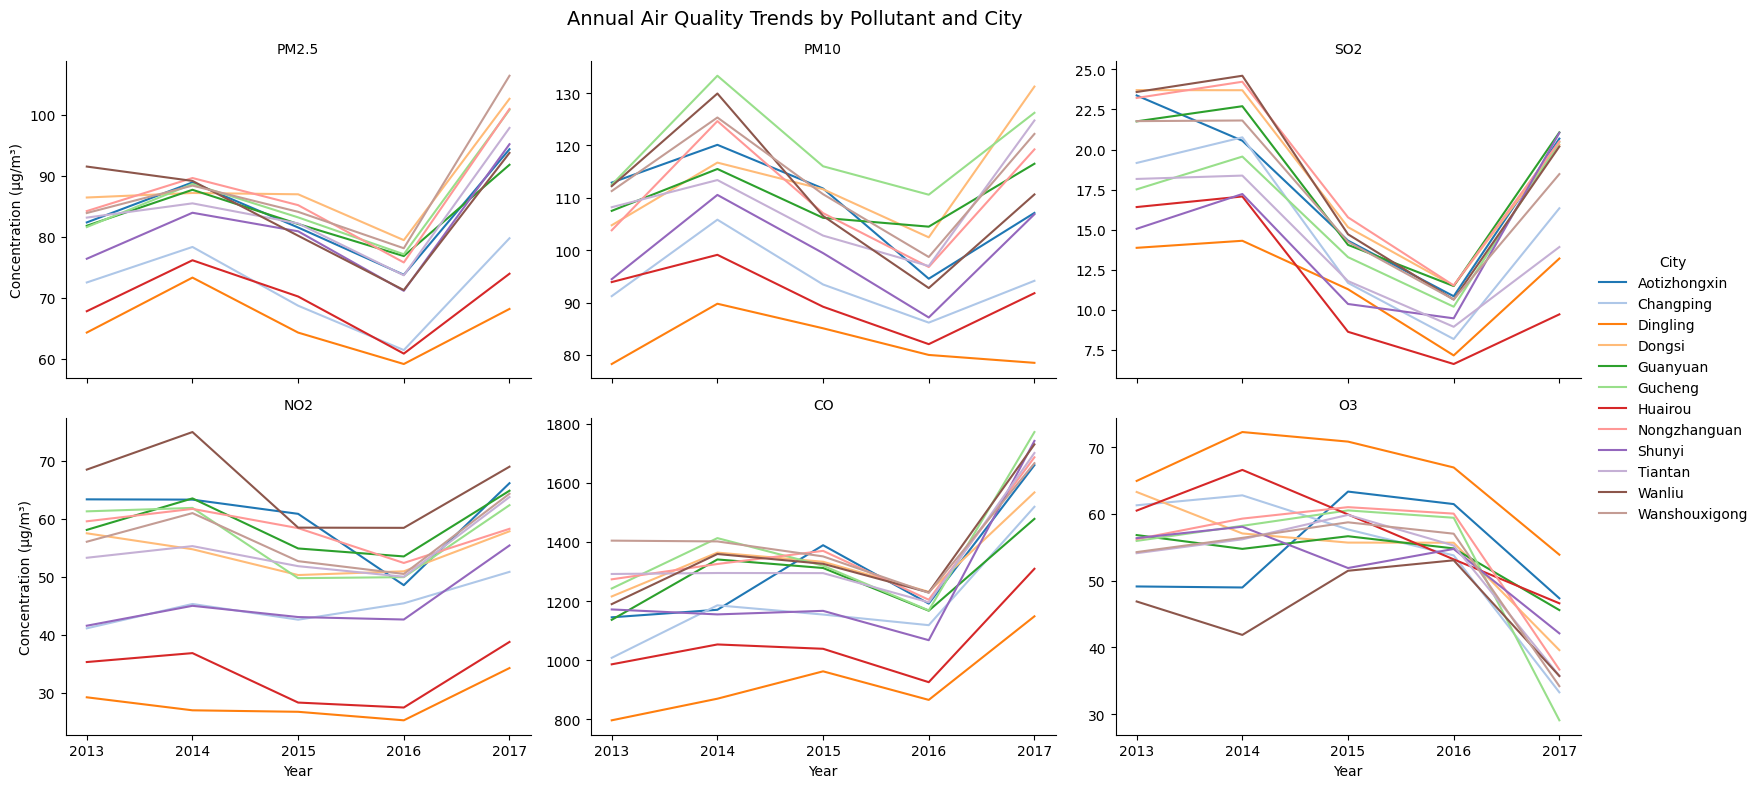

In [123]:
df_long = df_transposed.melt(
    id_vars=['City', 'Pollutant'],
    var_name='Year',
    value_name='Concentration'
)
df_long['Year'] = df_long['Year'].astype(int)

df_long = df_long[~df_long['Year'].isin([2012, 2018])]

plt.figure(figsize=(15, 10))
g = sns.relplot(
    data=df_long,
    x='Year',
    y='Concentration',
    hue='City',
    col='Pollutant',
    col_wrap=3,
    kind='line',
    palette='tab20',
    height=4,
    aspect=1.2,
    facet_kws={'sharey': False, 'sharex': True},
    linewidth=1.5,
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Concentration (µg/m³)")
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Annual Air Quality Trends by Pollutant and City', fontsize=14)

g._legend.set_bbox_to_anchor((1.10, 0.5))
g._legend.set_title('City')

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mticker.FixedLocator(df_long['Year'].unique()))
    ax.set_xticklabels([str(int(tick)) for tick in ax.get_xticks()], rotation=0)

plt.tight_layout()
plt.show()


### Pertanyaan 2: Pada jam atau hari apa polusi udara paling buruk di masing-masing kota atau distrik?

<ipython-input-124-eba43c19131b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


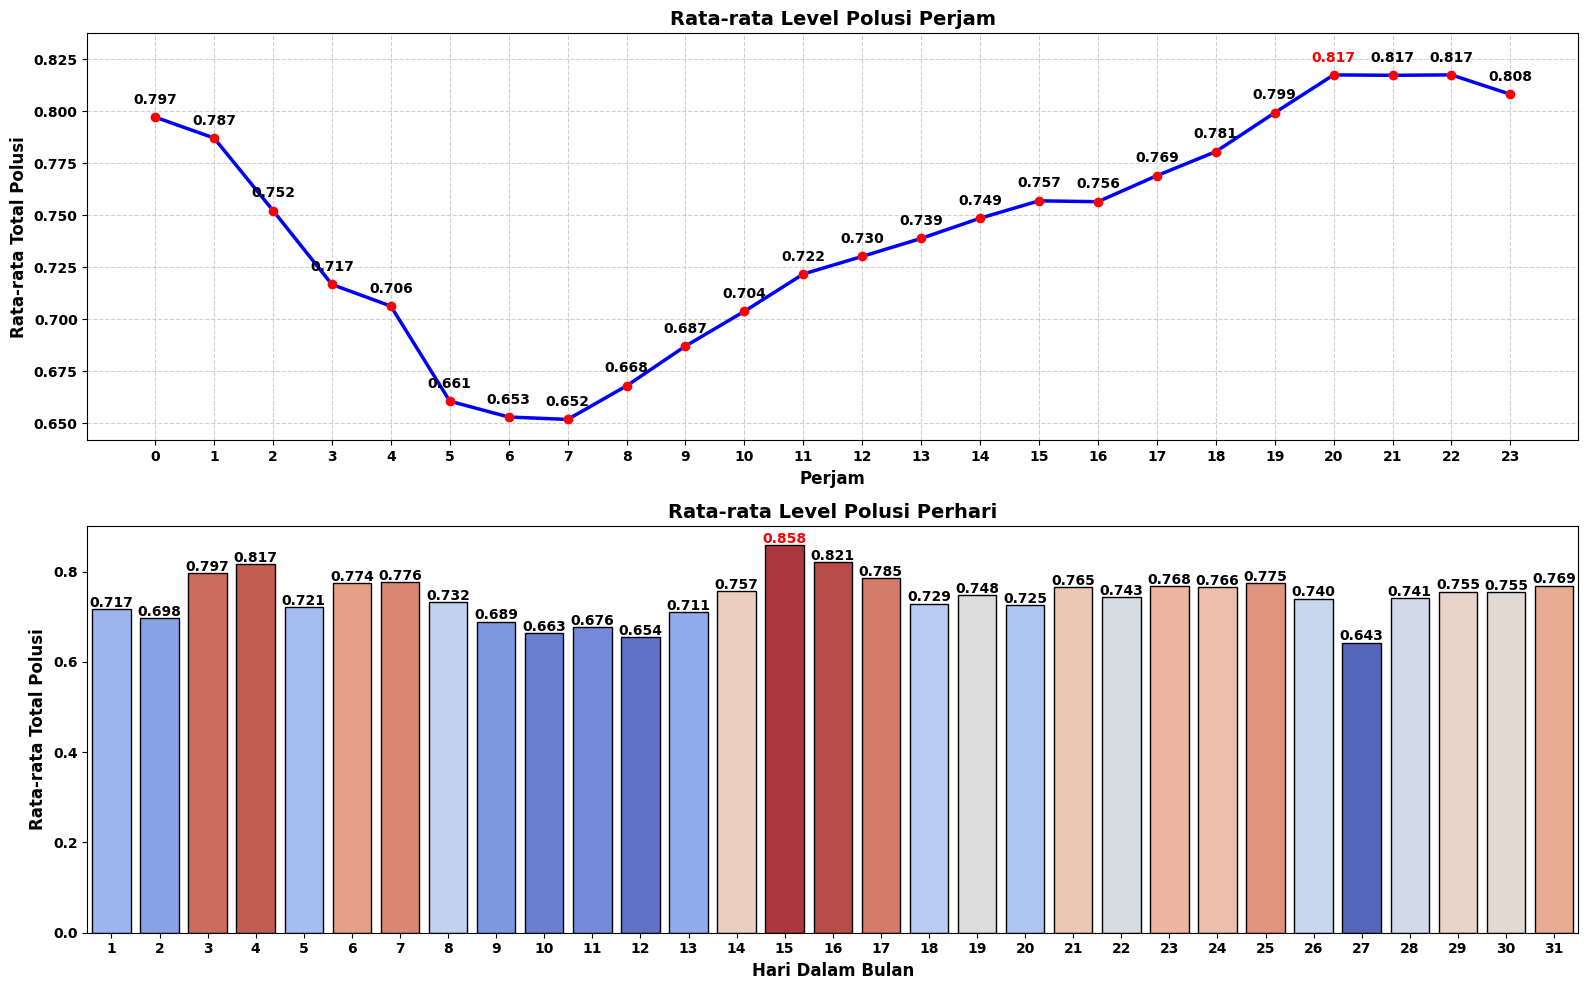

In [124]:
avg_pollution_by_hour = df_aotizhongxin_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_aotizhongxin_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-125-f5d3b8af1c6f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


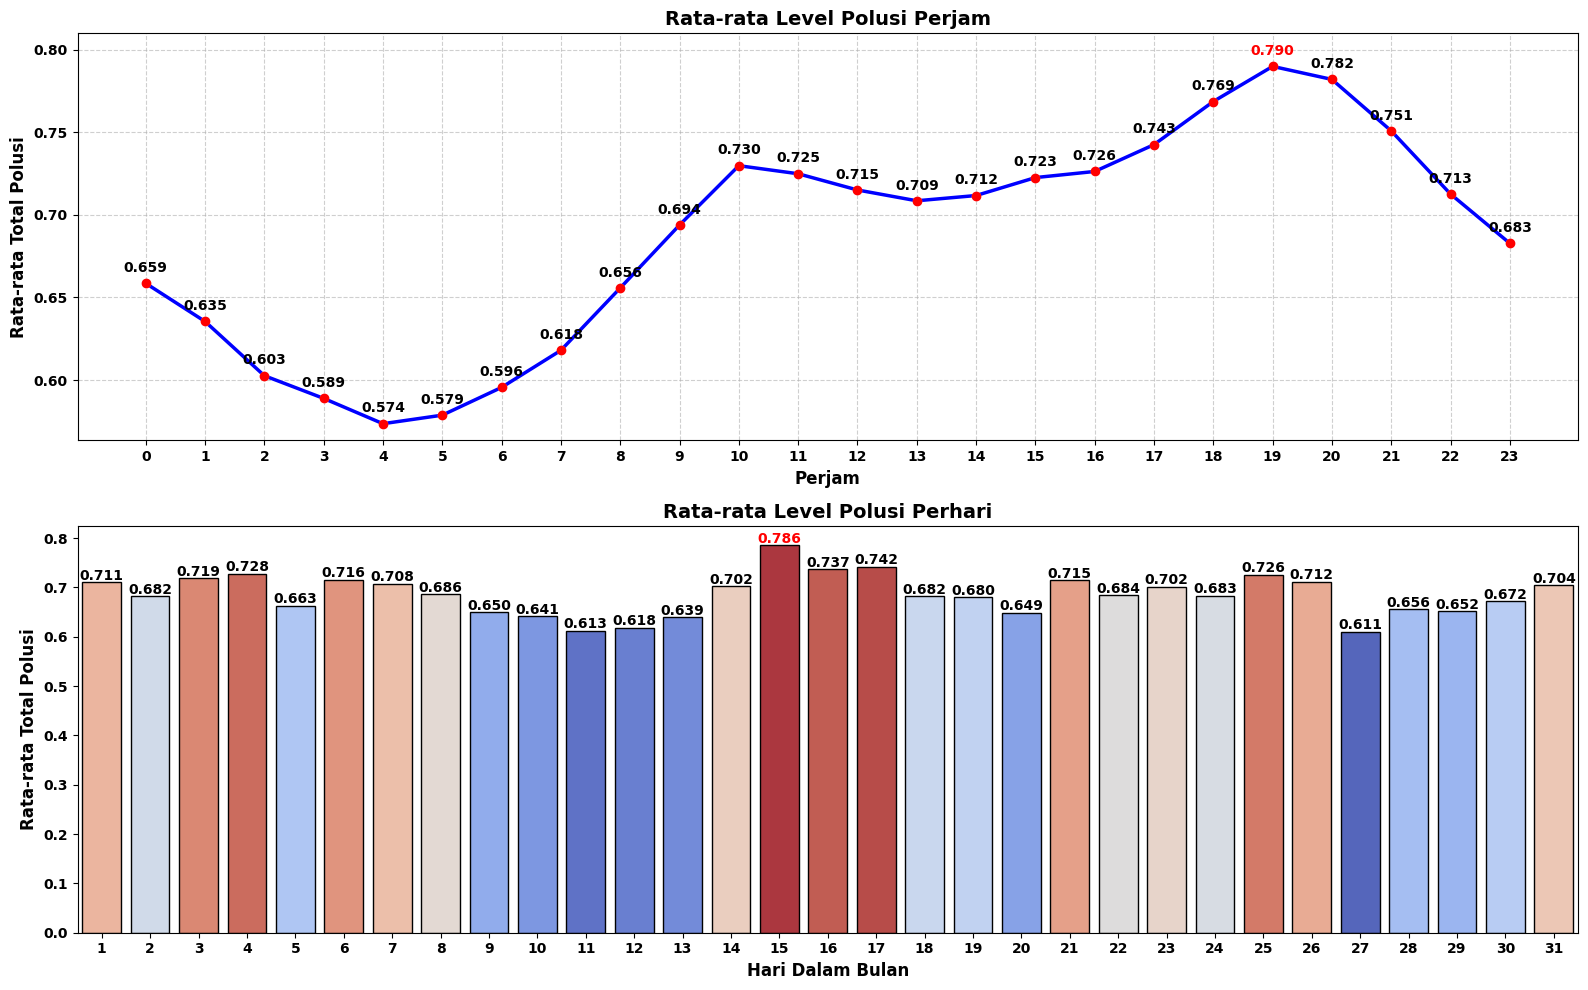

In [125]:
avg_pollution_by_hour = df_changping_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_changping_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-126-112c1091eb79>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


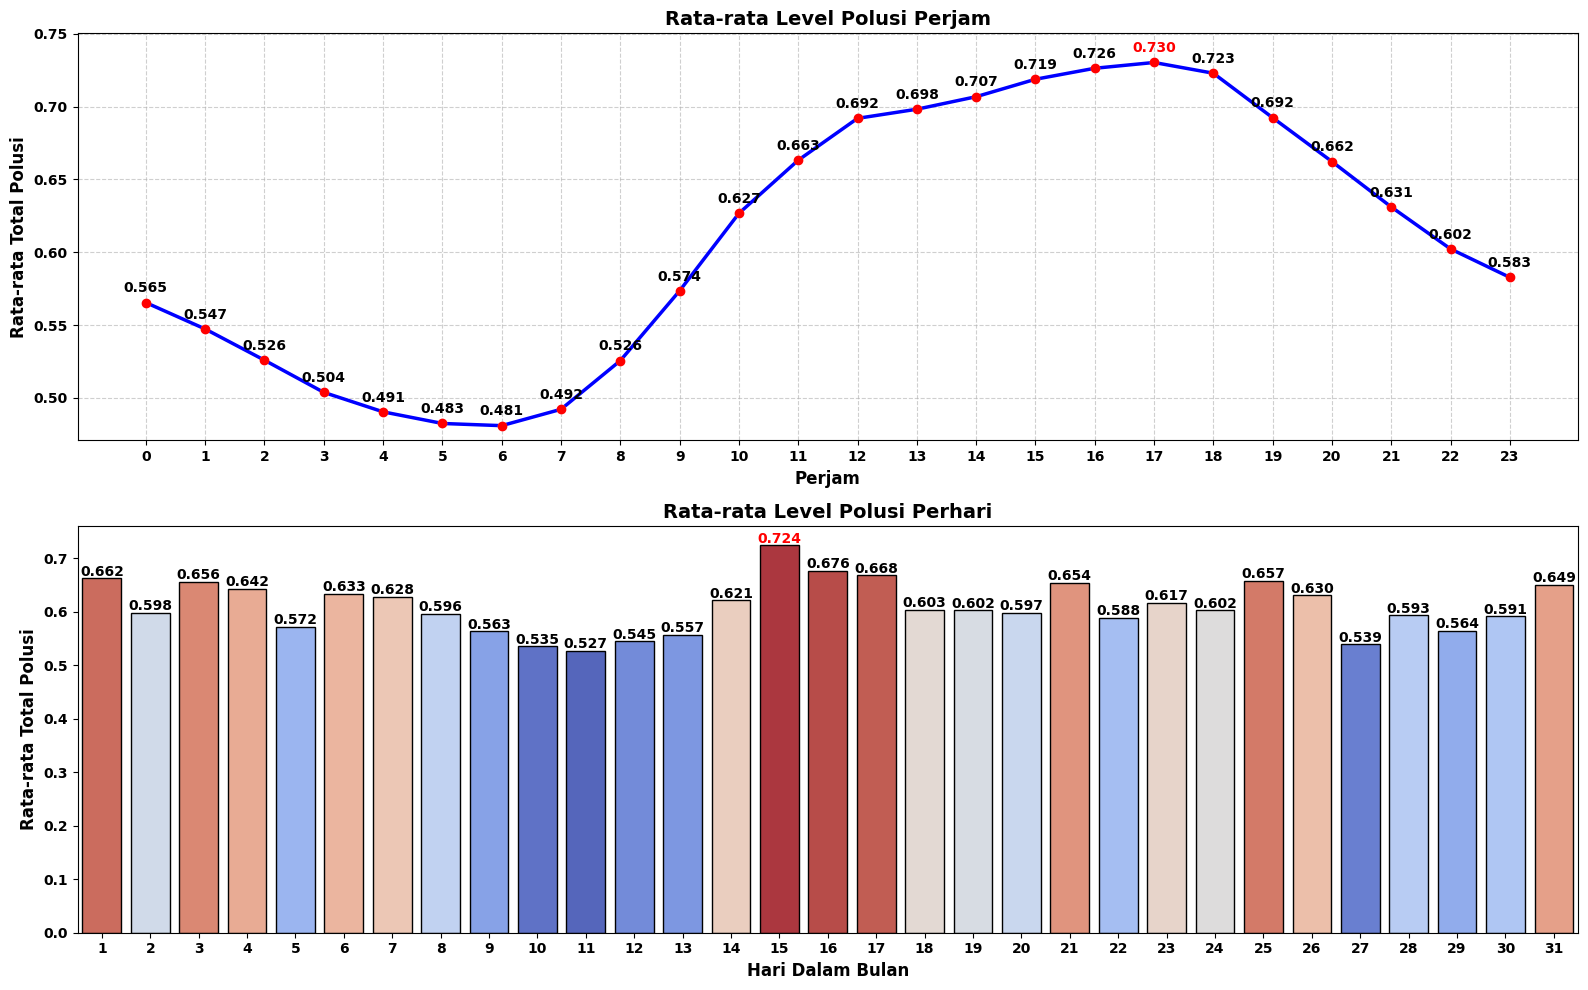

In [126]:
avg_pollution_by_hour = df_dingling_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_dingling_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<ipython-input-127-eaf1e2c721bf>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


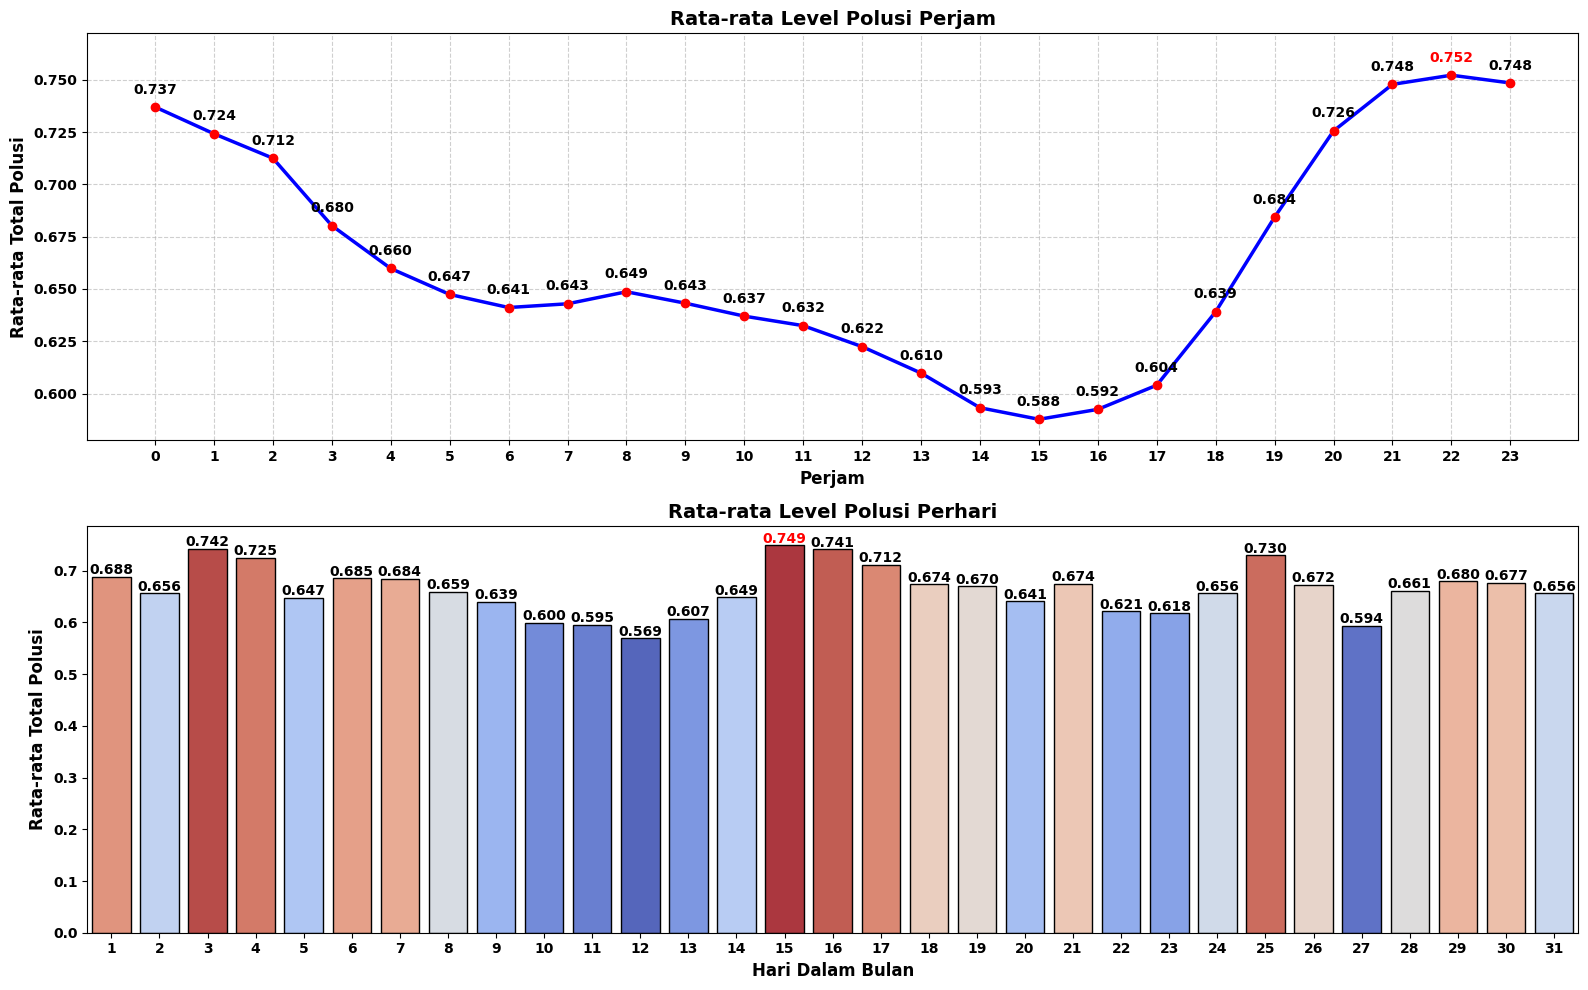

In [127]:
avg_pollution_by_hour = df_dongsi_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_dongsi_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-128-5b4c9e7652c4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


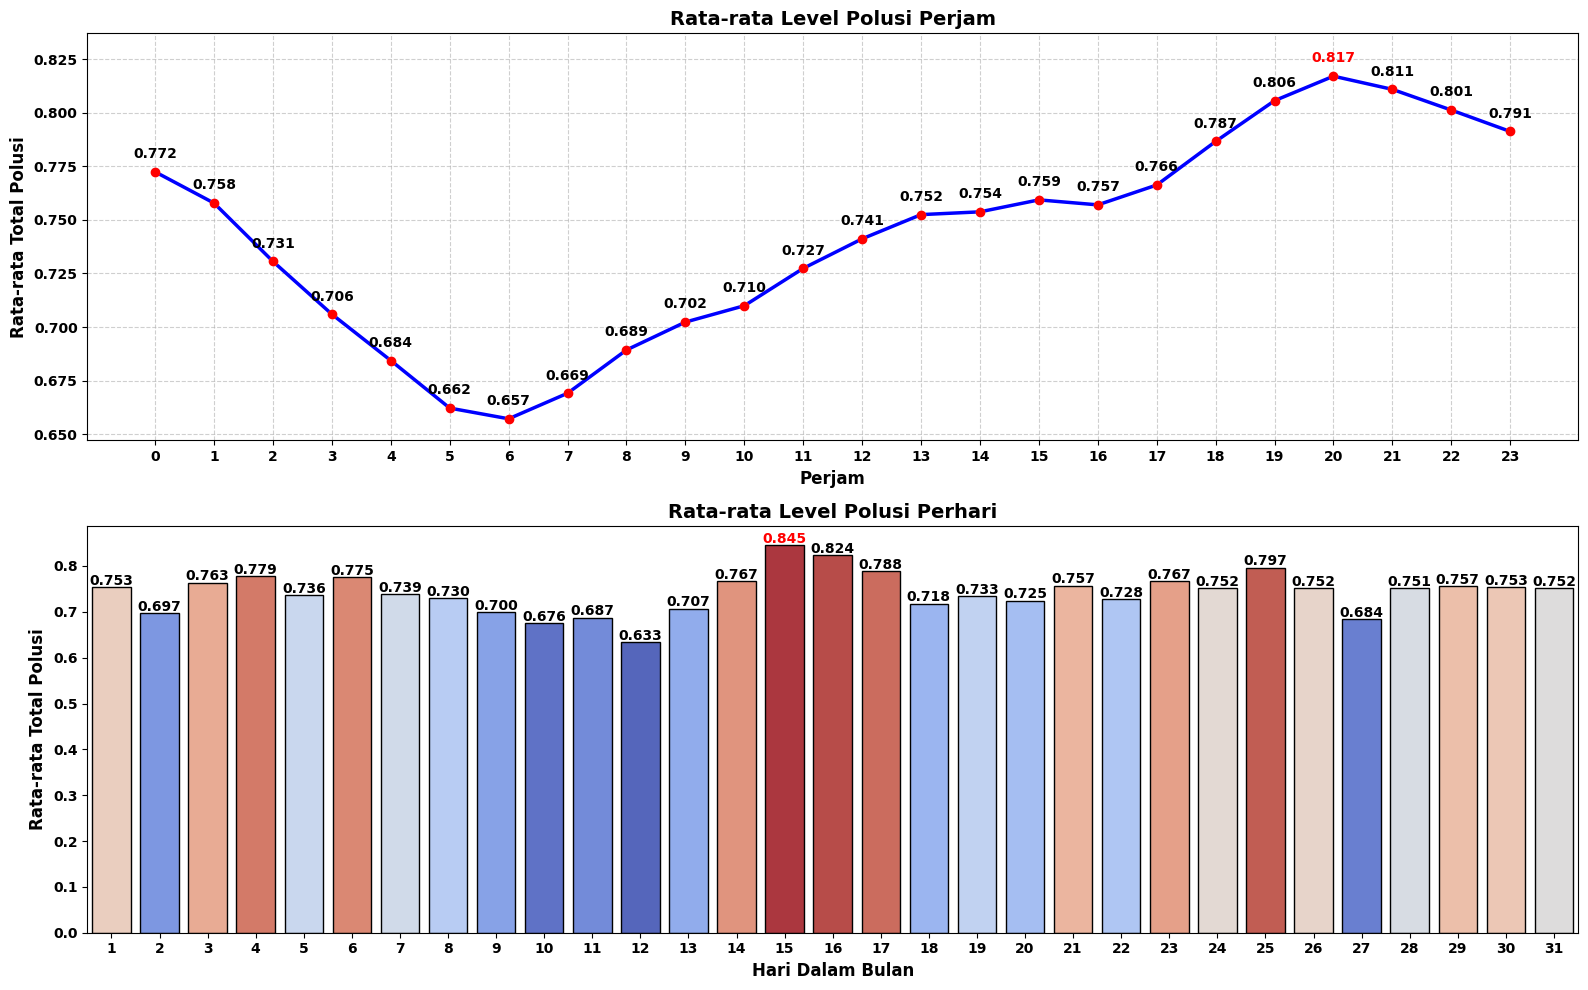

In [128]:
avg_pollution_by_hour = df_guanyuan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_guanyuan_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-129-659f17d7a0f2>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


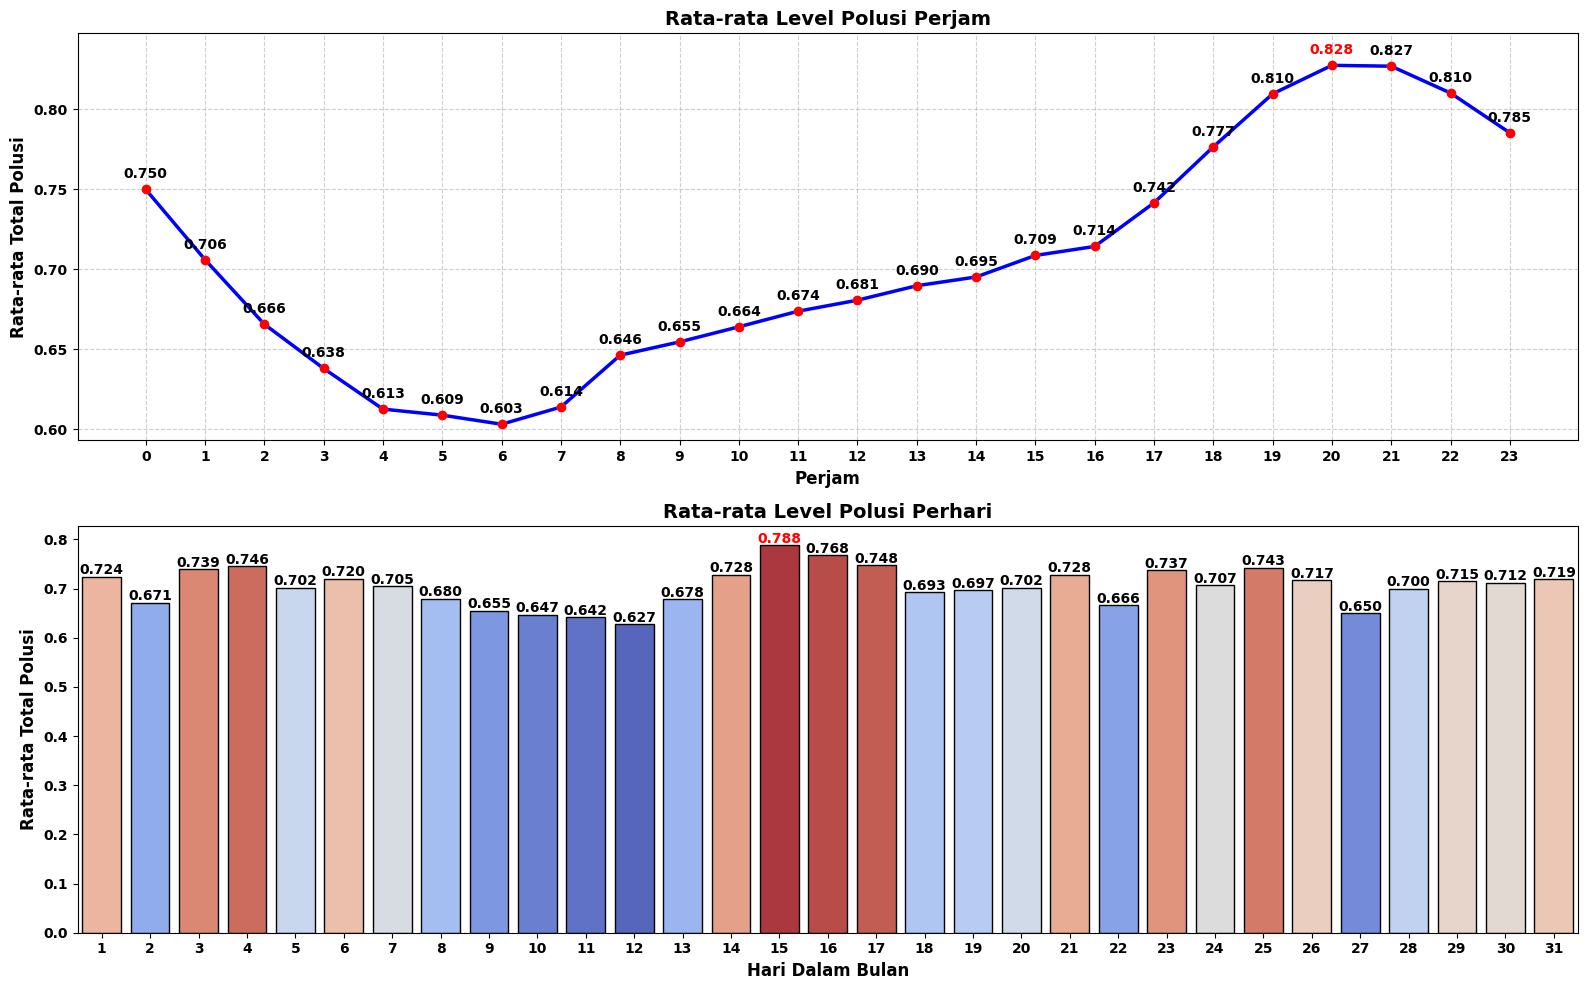

In [129]:
avg_pollution_by_hour = df_gucheng_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_gucheng_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<ipython-input-130-3d4bfa0d9212>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


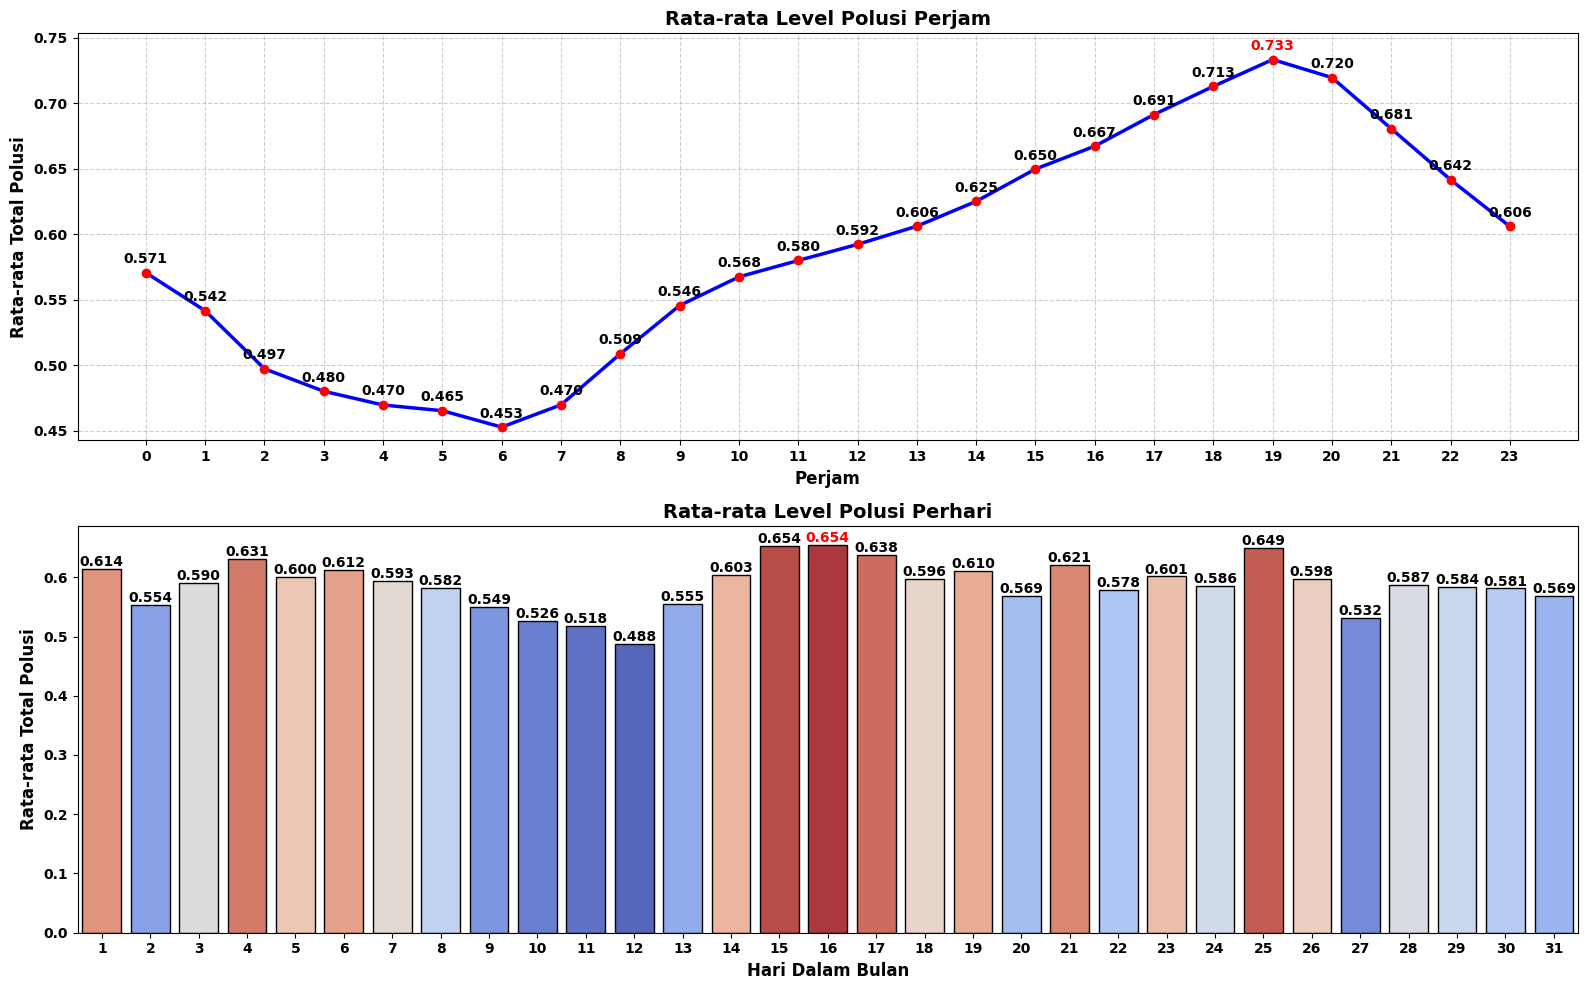

In [130]:
avg_pollution_by_hour = df_huairou_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_huairou_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-131-115e10c5cc3a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


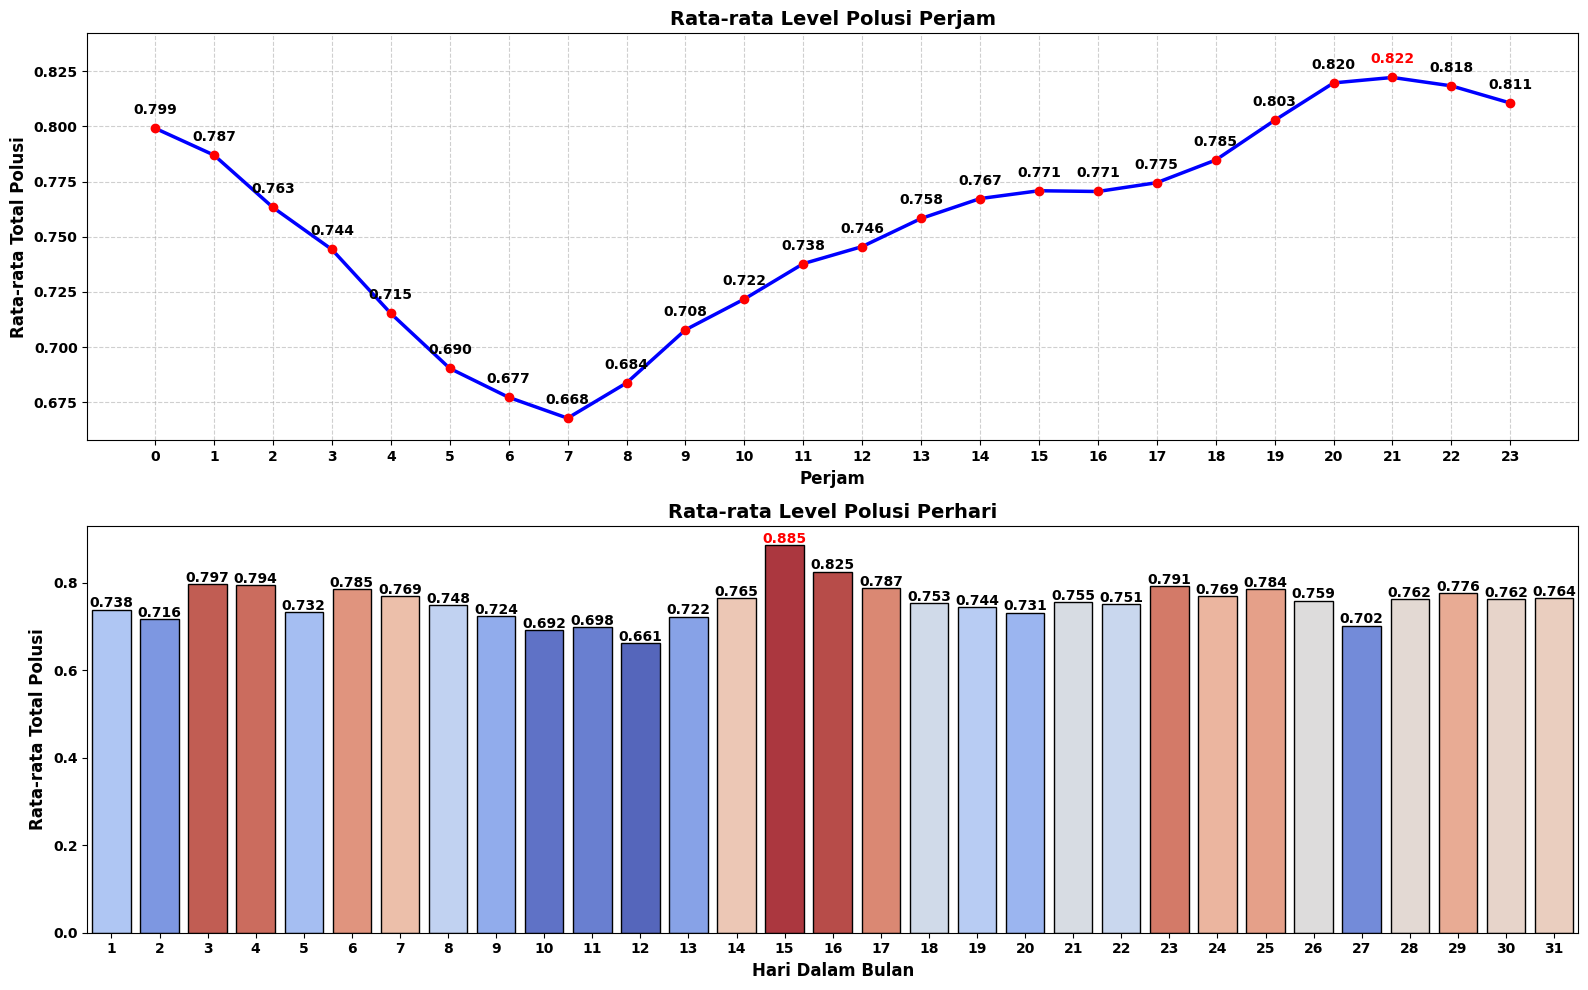

In [131]:
avg_pollution_by_hour = df_nongzhanguan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_nongzhanguan_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-132-43fa9499d195>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


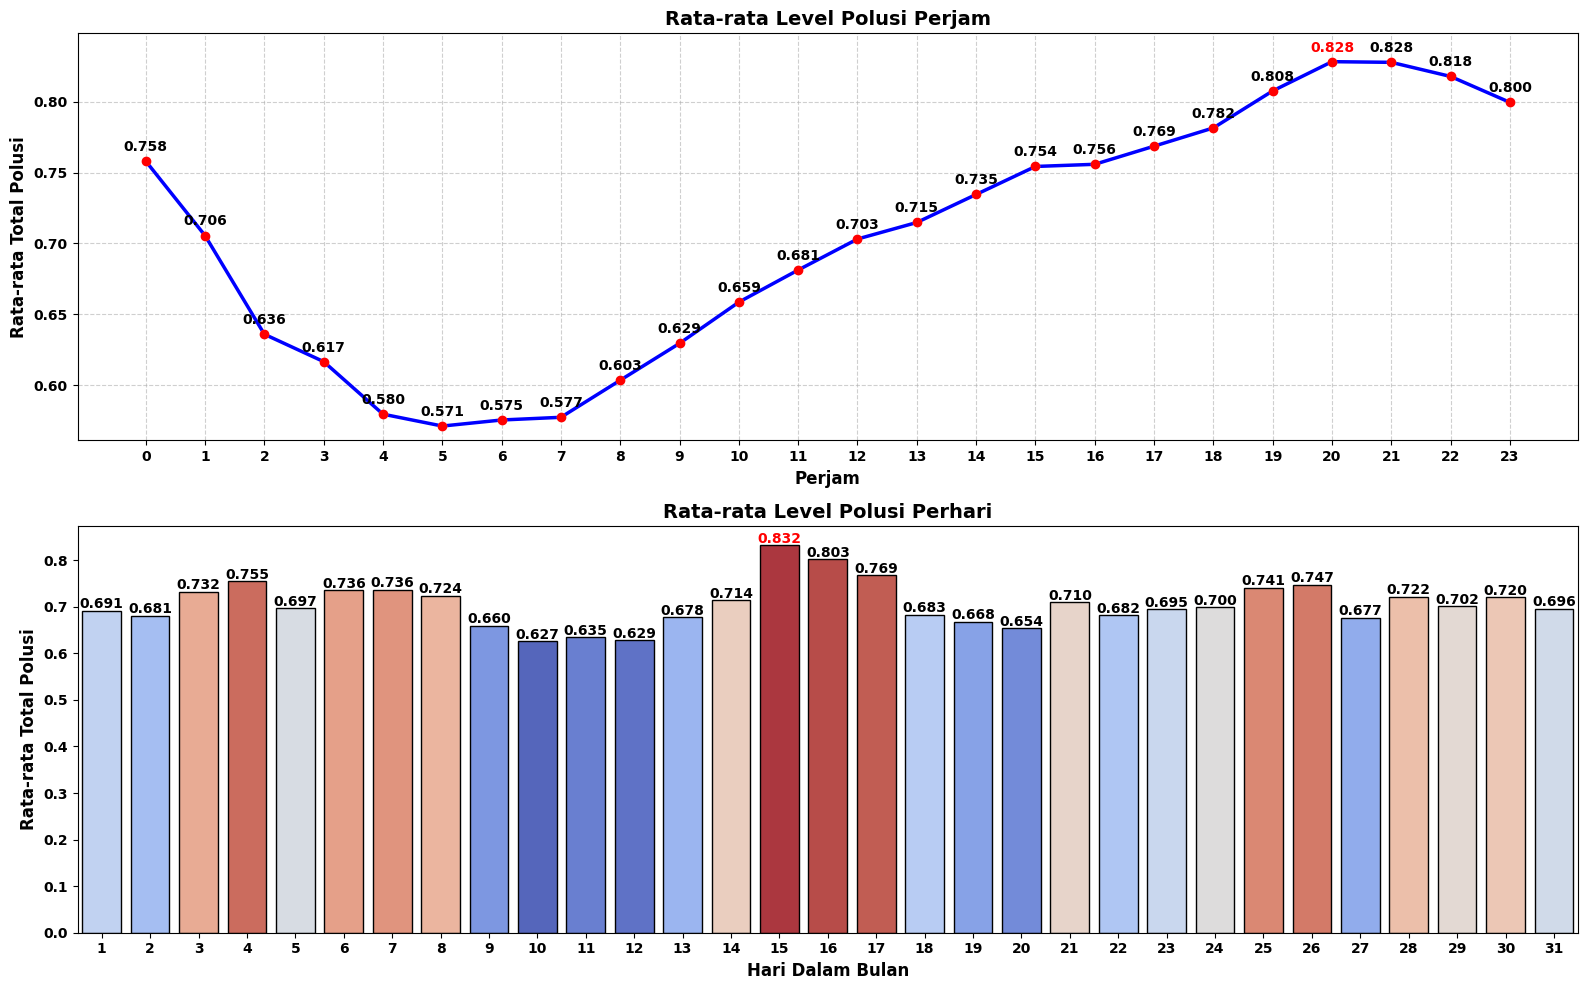

In [132]:
avg_pollution_by_hour = df_shunyi_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_shunyi_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-133-f8c11c3bb1f5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


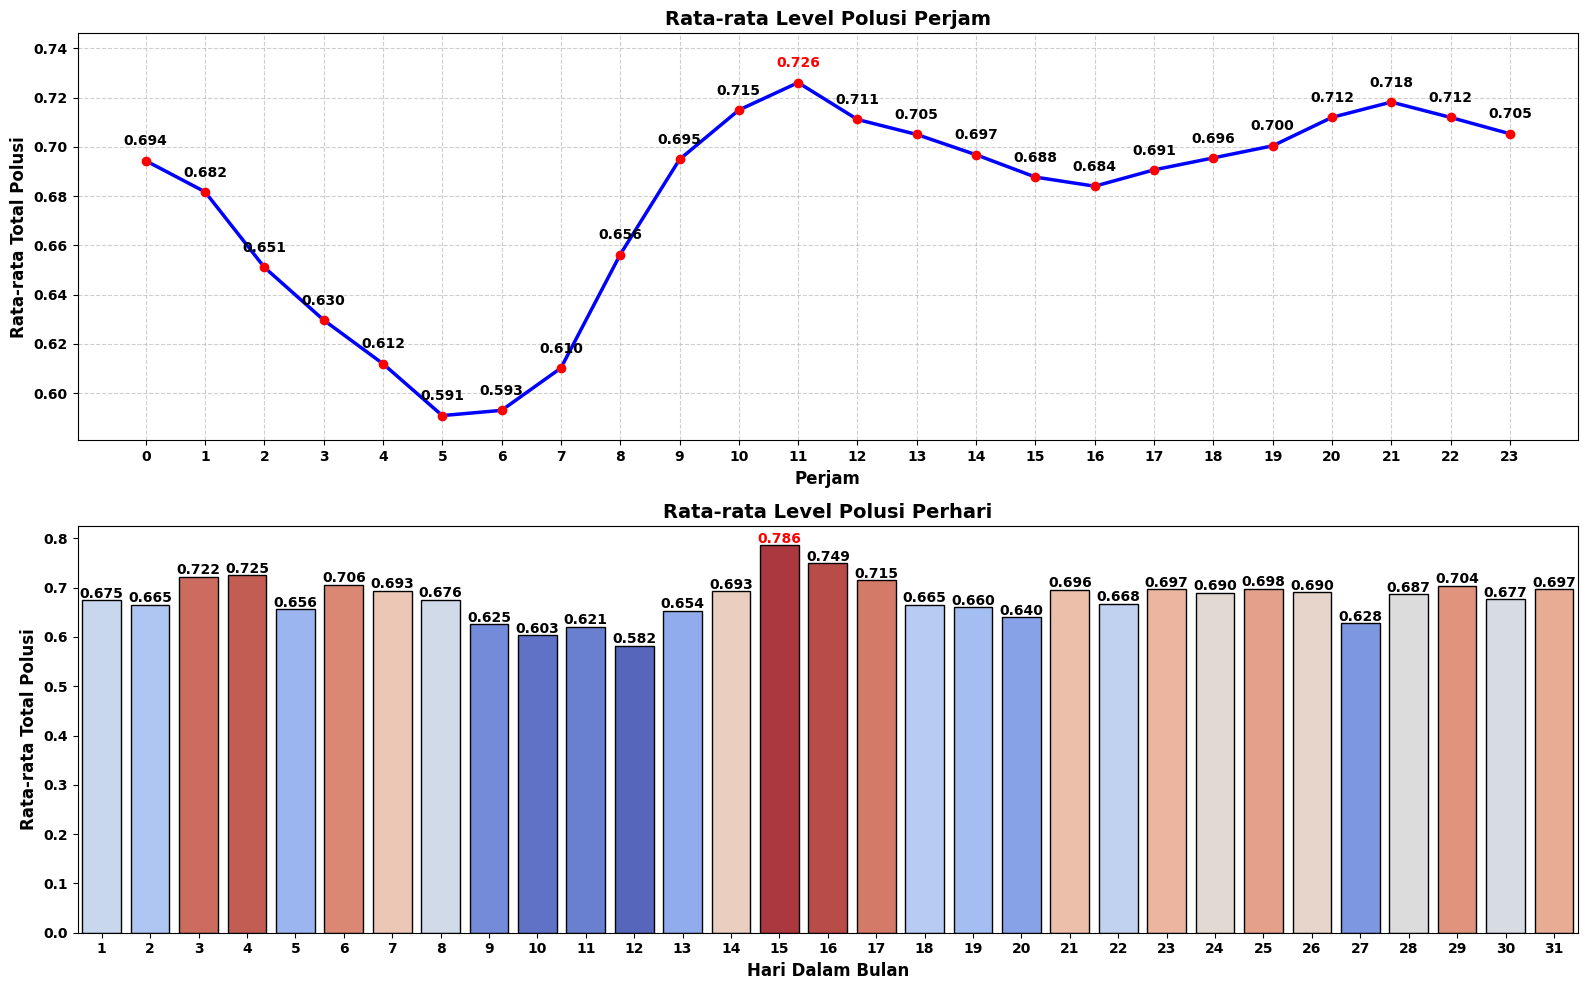

In [133]:
avg_pollution_by_hour = df_tiantan_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_tiantan_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-134-345db3c544fd>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


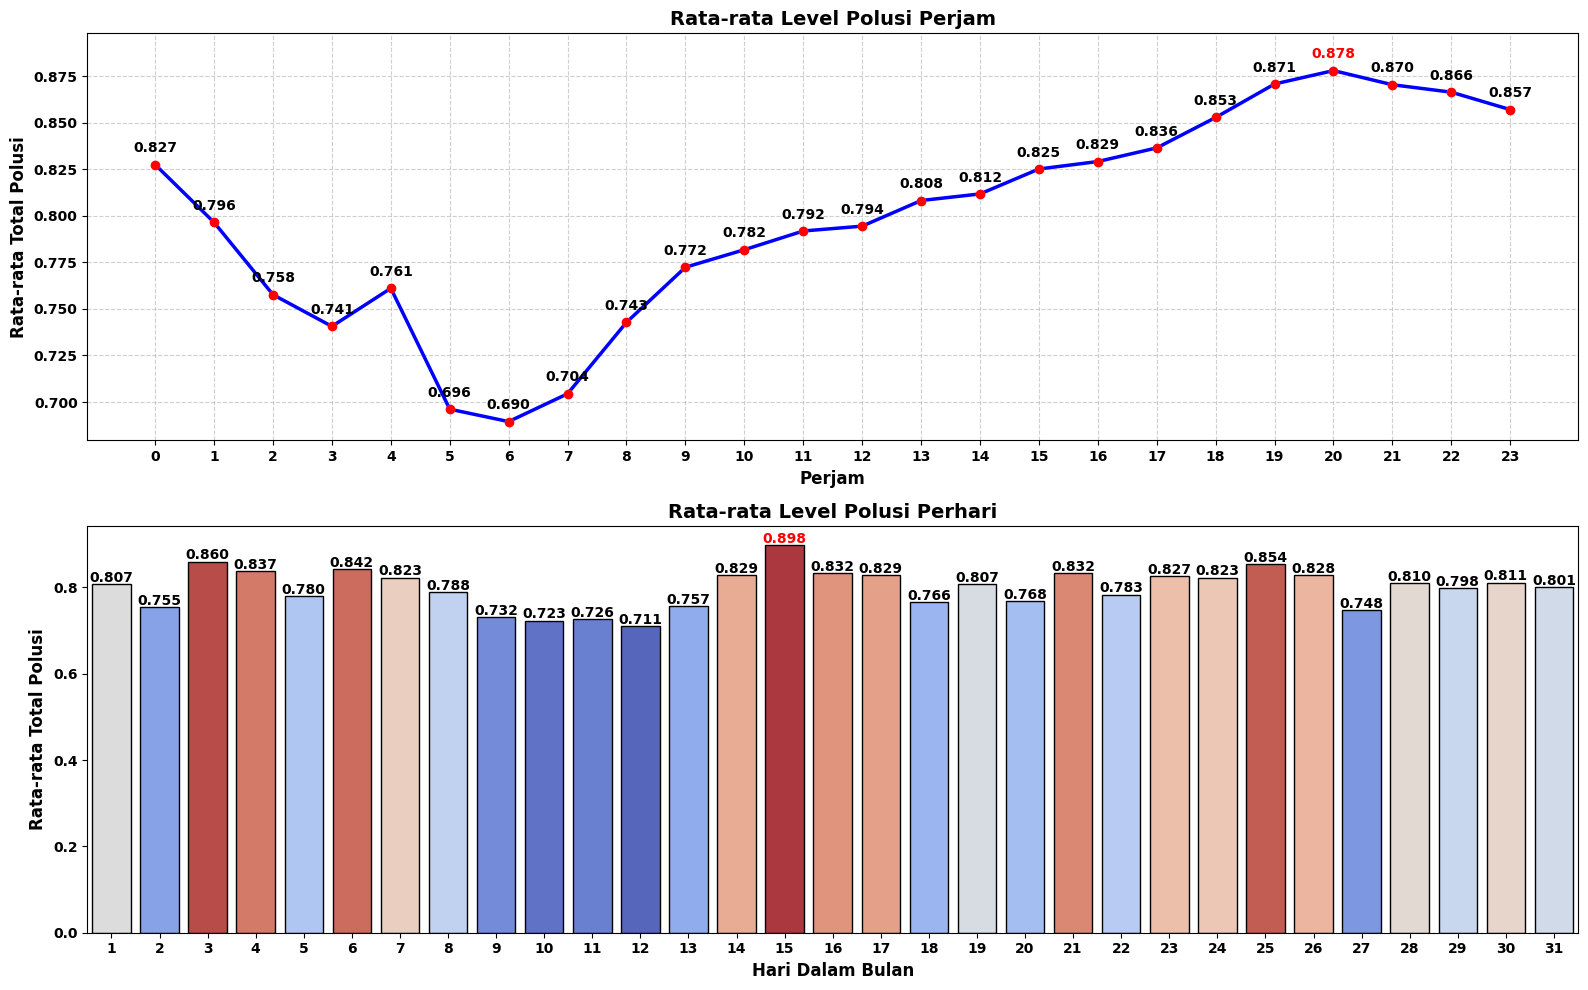

In [134]:
avg_pollution_by_hour = df_wanliu_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_wanliu_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<ipython-input-135-6d1889ac81c6>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')


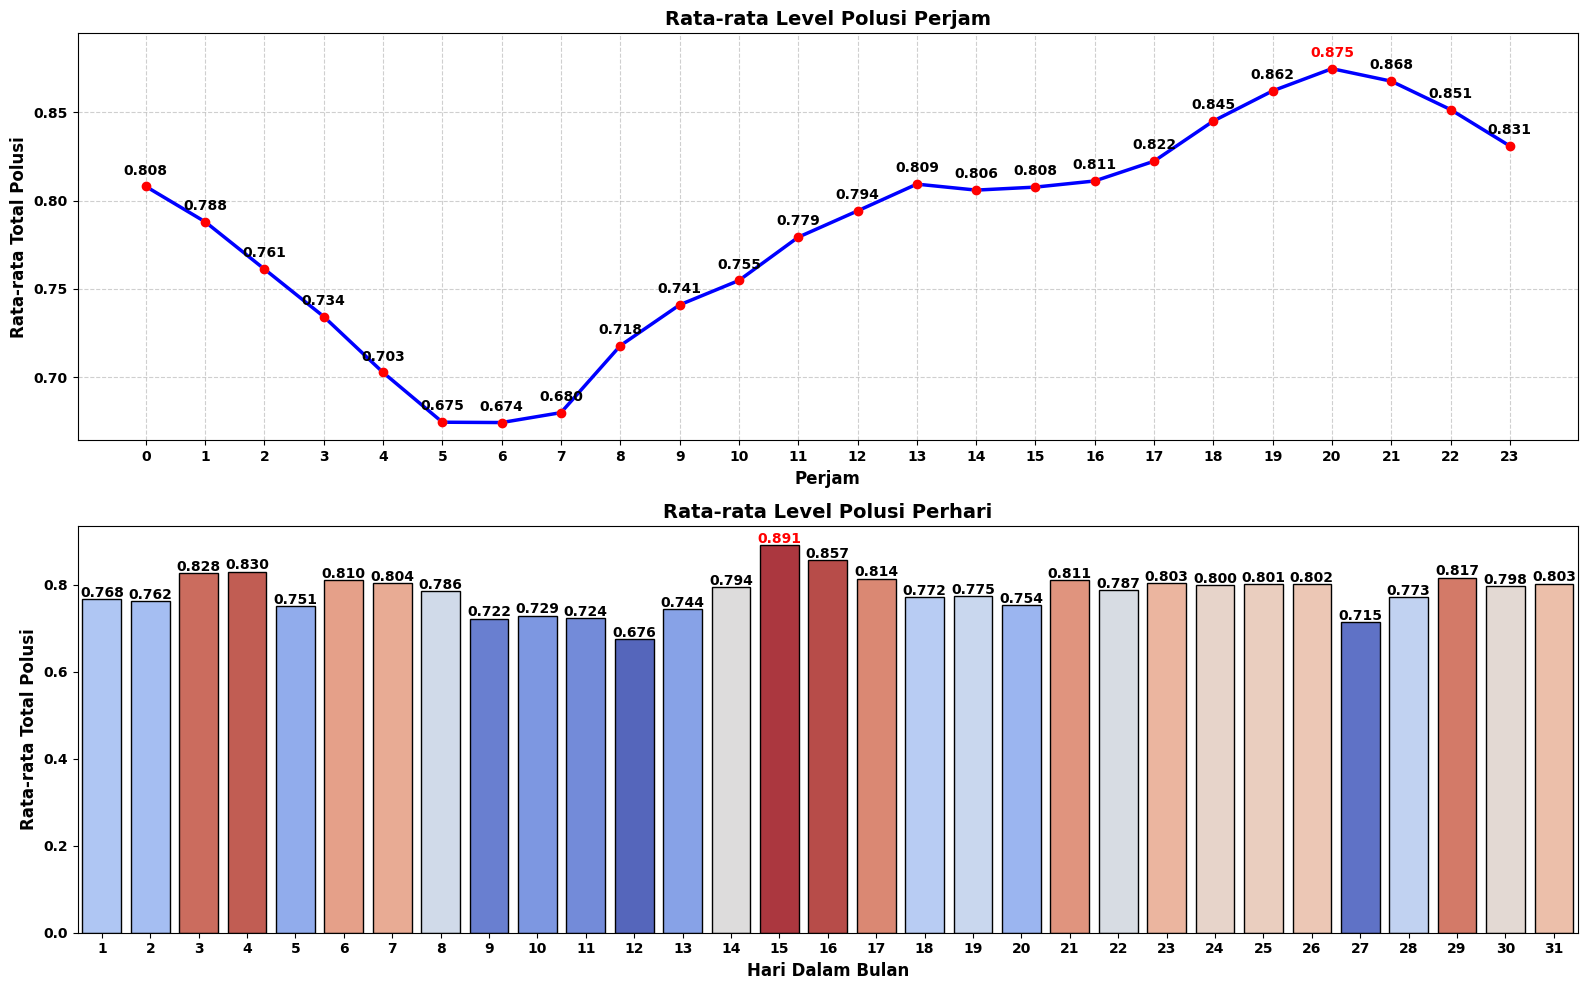

In [135]:
avg_pollution_by_hour = df_wanshouxigong_pollution.groupby("hour")["Total_Pollution"].mean()
avg_pollution_by_day = df_wanshouxigong_pollution.groupby("day")["Total_Pollution"].mean()

max_pollution_value_hour = avg_pollution_by_hour.max()
max_pollution_value_day = avg_pollution_by_day.max()

colors = sns.color_palette("coolwarm", len(avg_pollution_by_day))
sorted_indices = np.argsort(avg_pollution_by_day.values)
color_mapping = {index: colors[i] for i, index in enumerate(sorted_indices)}
bar_colors = [color_mapping[i] for i in range(len(avg_pollution_by_day))]

plt.figure(figsize=(16, 10))

# Grafik Polusi per Jam
plt.subplot(2, 1, 1)
sns.lineplot(x=avg_pollution_by_hour.index, y=avg_pollution_by_hour.values, marker='o', color='b', linewidth=2.5)

for x, y in zip(avg_pollution_by_hour.index, avg_pollution_by_hour.values):
    plt.scatter(x, y, color='red', zorder=3)
    color = 'red' if y == max_pollution_value_hour else 'black'
    plt.text(x, y + 0.005, f'{y:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Perjam", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perjam", fontsize=14, fontweight='bold')

plt.ylim(avg_pollution_by_hour.min() - 0.01, avg_pollution_by_hour.max() + 0.02)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_pollution_by_hour.index, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Grafik Polusi per Hari
plt.subplot(2, 1, 2)
ax = sns.barplot(x=avg_pollution_by_day.index, y=avg_pollution_by_day.values, palette=bar_colors, edgecolor='black')

for i, value in enumerate(avg_pollution_by_day.values):
    color = 'red' if value == max_pollution_value_day else 'black'
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', fontsize=10, fontweight='bold', color=color)

plt.xlabel("Hari Dalam Bulan", fontsize=12, fontweight='bold')
plt.ylabel("Rata-rata Total Polusi", fontsize=12, fontweight='bold')
plt.title("Rata-rata Level Polusi Perhari", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah ada perbedaan tren polusi antara siang dan malam di masing-masing kota atau distrik?

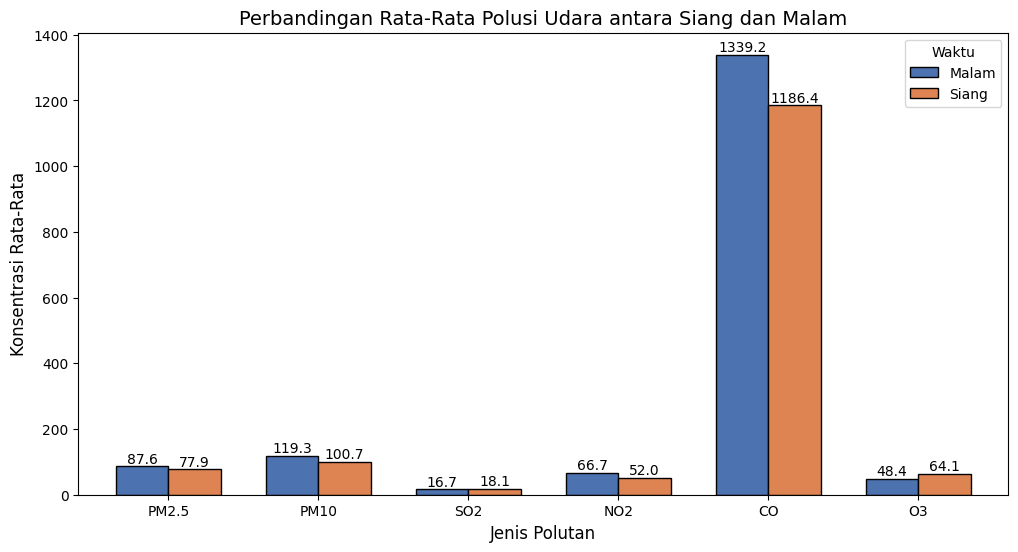

In [136]:
df_aotizhongxin['time_of_day'] = df_aotizhongxin['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_aotizhongxin.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


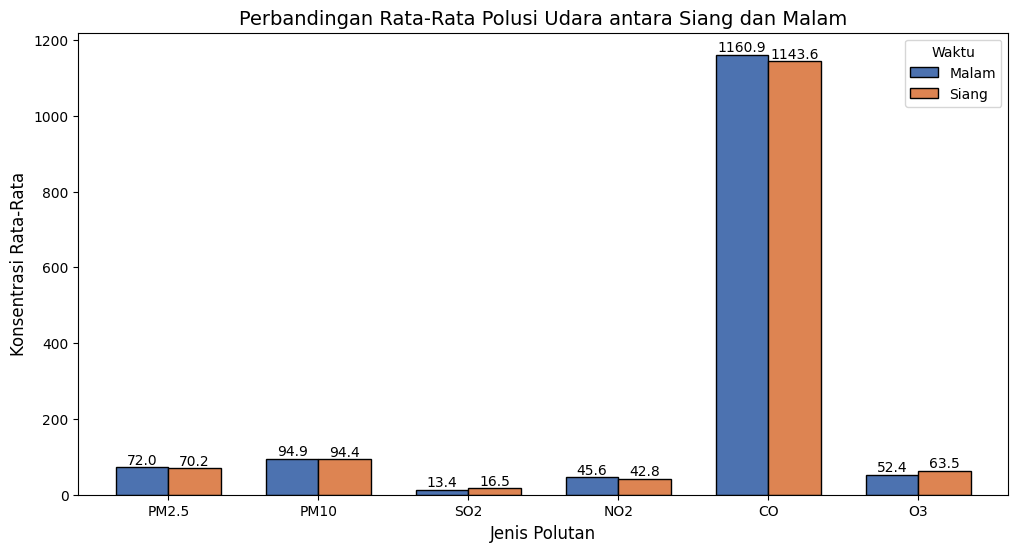

In [137]:
df_changping['time_of_day'] = df_changping['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_changping.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()

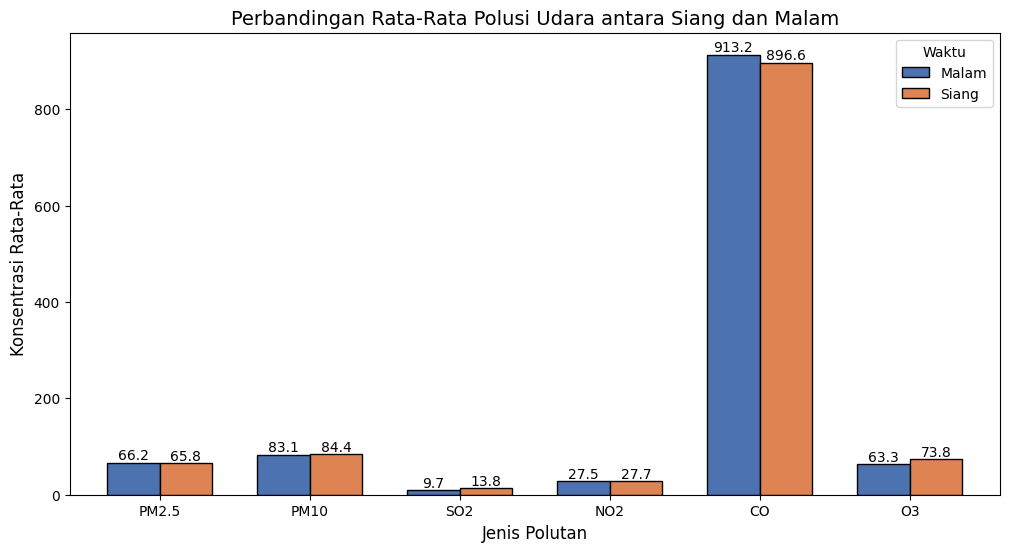

In [138]:
df_dingling['time_of_day'] = df_dingling['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_dingling.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()

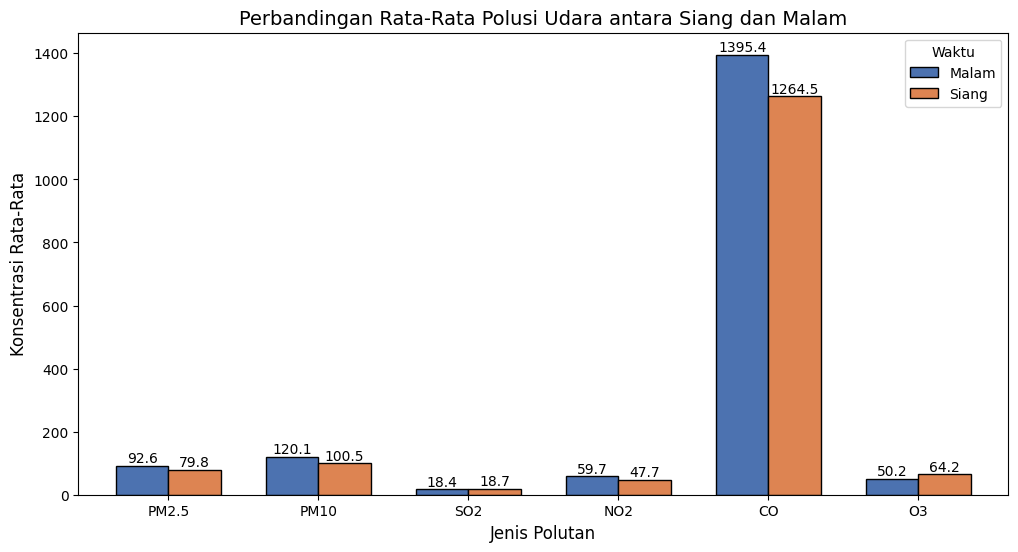

In [139]:
df_dongsi['time_of_day'] = df_dongsi['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_dongsi.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()

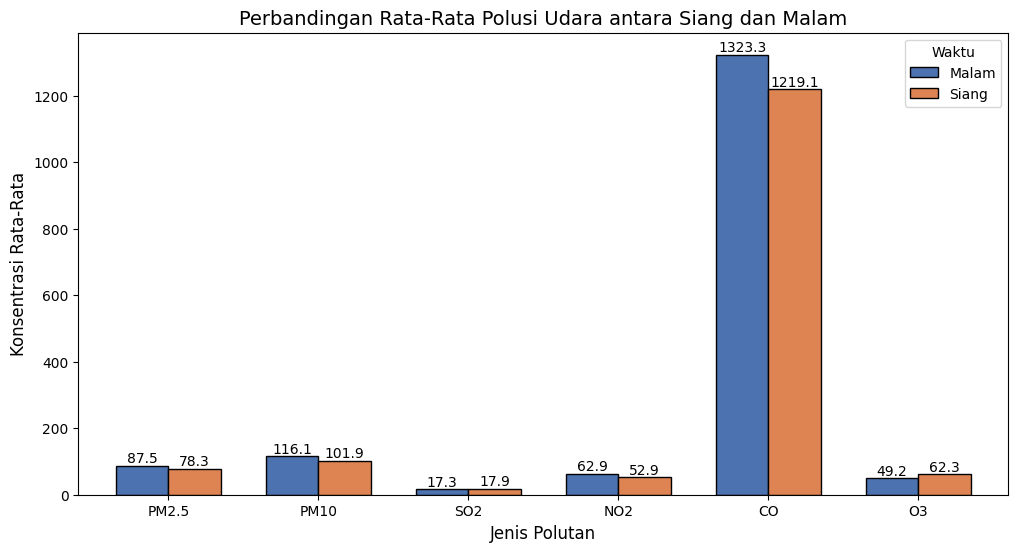

In [140]:
df_guanyuan['time_of_day'] = df_guanyuan['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_guanyuan.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


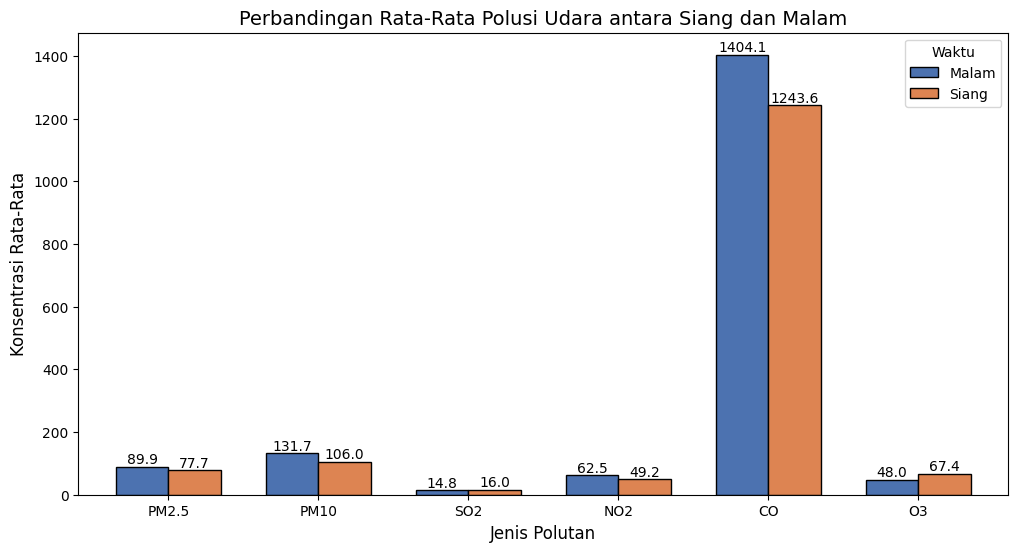

In [141]:
df_gucheng['time_of_day'] = df_gucheng['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_gucheng.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


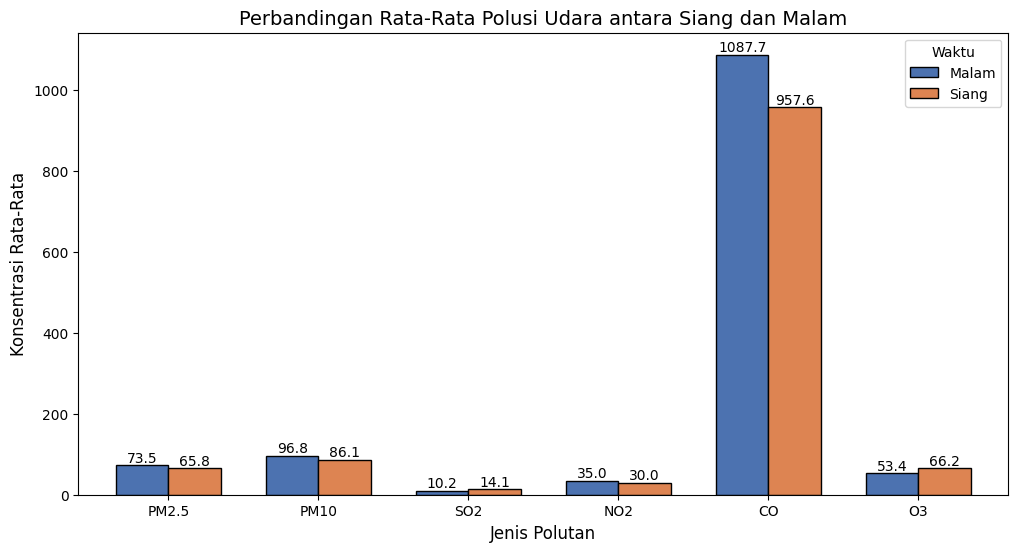

In [142]:
df_huairou['time_of_day'] = df_huairou['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_huairou.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


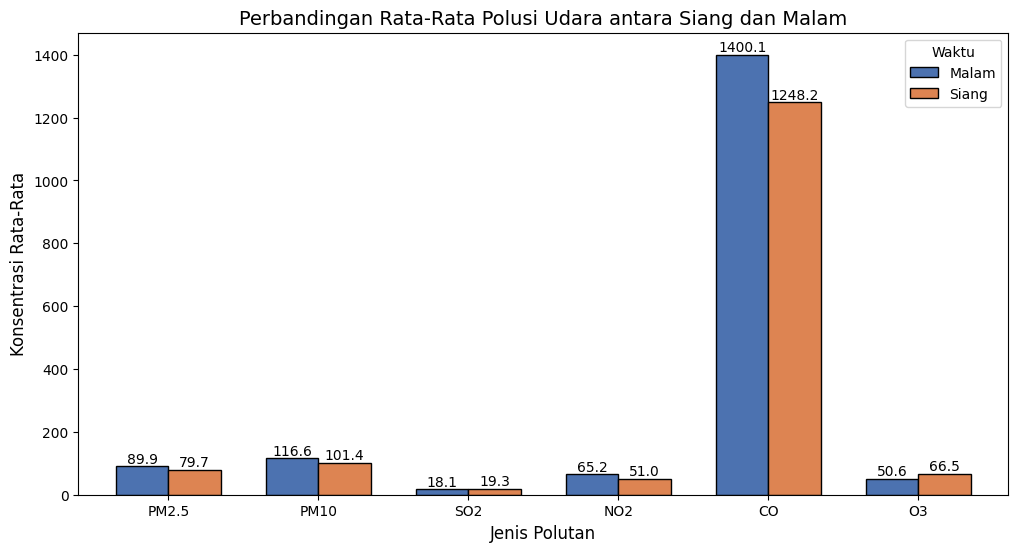

In [143]:
df_nongzhanguan['time_of_day'] = df_nongzhanguan['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_nongzhanguan.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


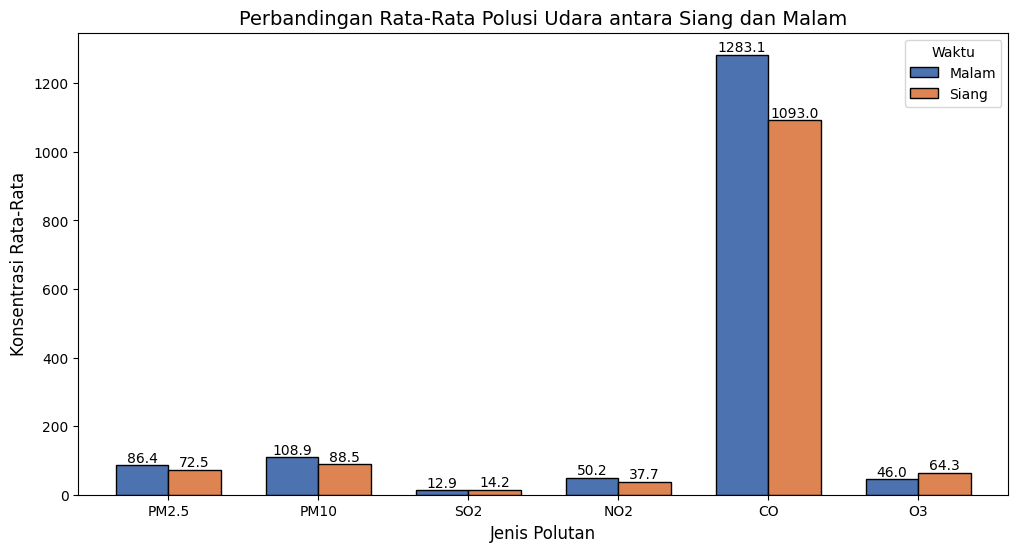

In [144]:
df_shunyi['time_of_day'] = df_shunyi['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_shunyi.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


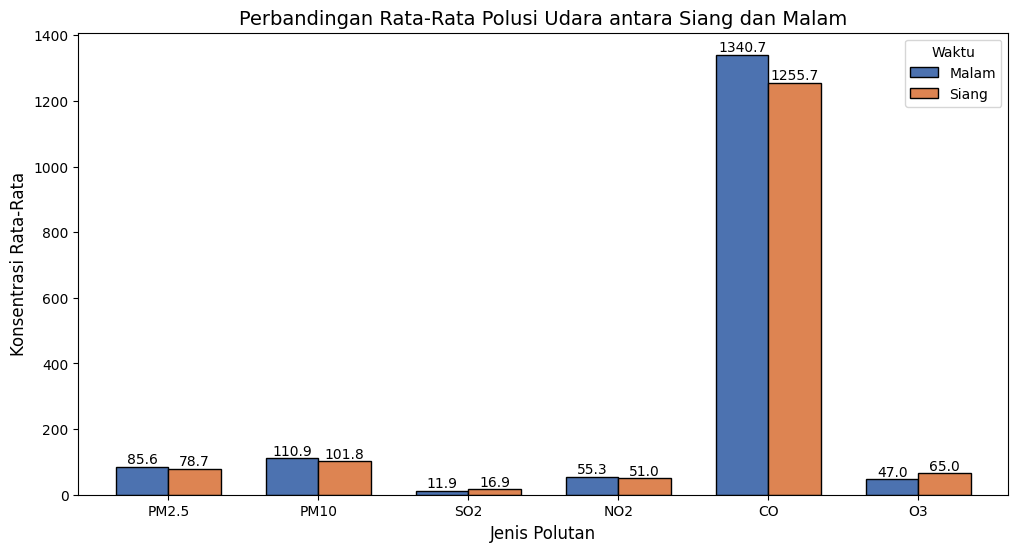

In [145]:
df_tiantan['time_of_day'] = df_tiantan['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_tiantan.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()

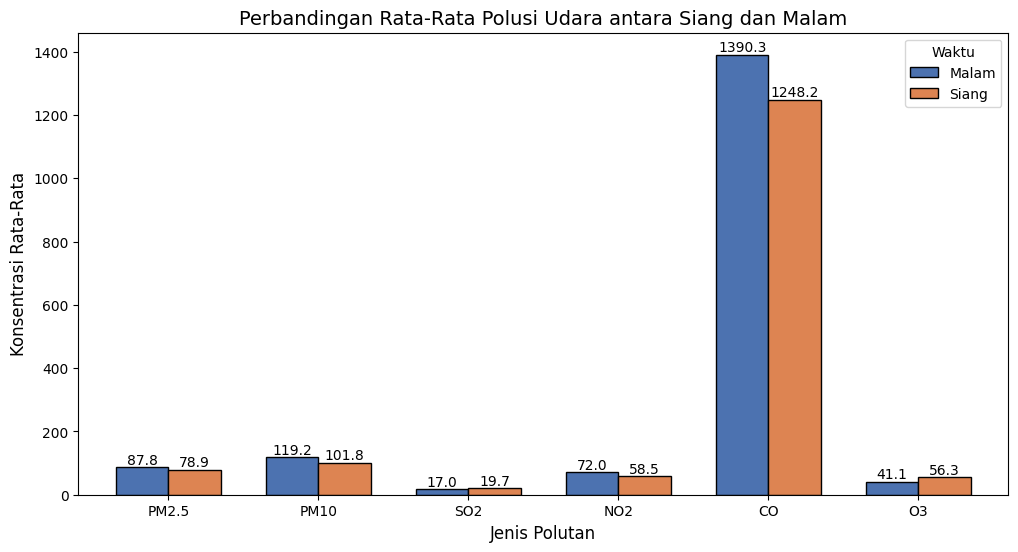

In [146]:
df_wanliu['time_of_day'] = df_wanliu['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_wanliu.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()

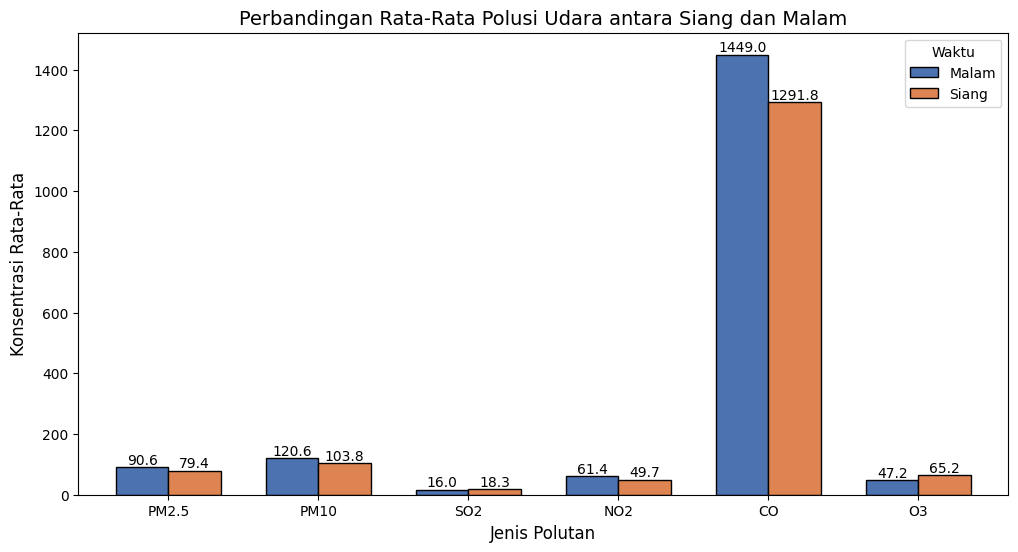

In [147]:
df_wanshouxigong['time_of_day'] = df_wanshouxigong['hour'].apply(lambda x: 'Siang' if 6 <= x < 18 else 'Malam')

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

avg_pollution = df_wanshouxigong.groupby('time_of_day')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#4c72b0', '#dd8452']

bars = avg_pollution.T.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)

for bars_group in bars.containers:
    for bar in bars_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Perbandingan Rata-Rata Polusi Udara antara Siang dan Malam', fontsize=14)
ax.set_xlabel('Jenis Polutan', fontsize=12)
ax.set_ylabel('Konsentrasi Rata-Rata', fontsize=12)
ax.set_xticklabels(avg_pollution.columns, rotation=0)
ax.legend(['Malam', 'Siang'], title="Waktu")

plt.show()


**Insight:**
- Polusi tertinggi setiap kota terjadi pada malam hari
- Polusi tertinggi setiap kota atau distrik terjadi pada tanggal 15, dan tanggal 16 untuk huairo setiap bulan
- Utuk Jenis polutan yang paling tinggi di siang dan malam adalah karbon dioksida (CO)

## Analisis Lanjutan (Opsional)

Disini saya menggunakan analisis lanjutan yaitu faktor apa yang paling berkontribusi terhadap peningkatan polusi udara di semua data

Korelasi dengan PM2.5:
PM2.5    1.000000
PM10     0.883197
CO       0.783727
NO2      0.666210
SO2      0.481860
DEWP     0.114411
PRES     0.018773
hour     0.011462
month    0.009964
day      0.003436
RAIN    -0.014289
No      -0.023762
year    -0.025915
TEMP    -0.130800
O3      -0.149393
WSPM    -0.271509
Name: PM2.5, dtype: float64


<ipython-input-148-c3f3043058d6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_pm25.index, y=correlation_pm25.values, palette=colors)


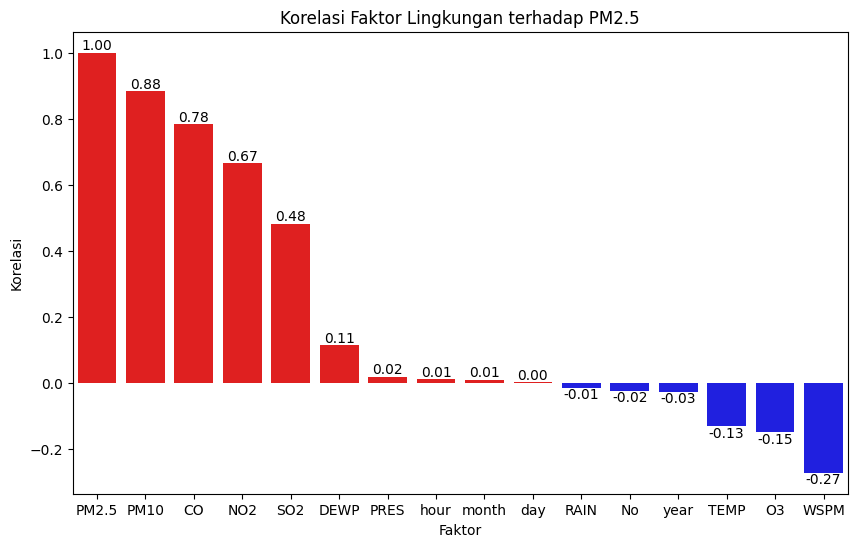

In [148]:
df = pd.concat([df_Aotizhongxin, df_Changping, df_Dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi,
                df_tiantan, df_wanliu, df_wanshouxigong], ignore_index=True)

df_numeric = df.select_dtypes(include=["number"])

correlation_matrix = df_numeric.corr()
correlation_pm25 = correlation_matrix["PM2.5"].sort_values(ascending=False)

print("Korelasi dengan PM2.5:")
print(correlation_pm25)

colors = ["red" if value > 0 else "blue" for value in correlation_pm25.values]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=correlation_pm25.index, y=correlation_pm25.values, palette=colors)
plt.xticks(rotation=0)
plt.title("Korelasi Faktor Lingkungan terhadap PM2.5")
plt.xlabel("Faktor")
plt.ylabel("Korelasi")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
    else:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='top', fontsize=10, color='black')

plt.show()




**Insight:**
- PM2.5, PM10, dan CO, adalah faktor yang tinggi dalam berkontribusi terhadap peningkatan polusi udara di semua data
- WSPM, O3, dan TEMP, merupakan faktor yang menurunkan polusi udara

## Conclusion

- Conclution pertanyaan pertama
PM2.5 dan PM10, merupakan polutan yang paling tinggi disemua kota

- Conclution pertanyaan kedua  
Pada kota titik polusi tertinggi adalah pada tanggal 15, kecuali Huairou yaitu tanggal 16, pada polusi harian pada pukul 20.00, kecuali pada kota Tiantan yaitu pada pukul 11.00, Dingling pukul 17.00, Nongzhanguan 21.00, Huariu 19.00, Dongsi 22.00, dan Changping 19.00   

- Conclution pertanyaan ketiga  
Polusi tertinggi terjadi pada malam hari dibandingkan dengan siang hari

- Conclution analisis tambahan
PM2.5, adalah faktor yang paling tinggi dalam berkontribusi terhadap peningkatan polusi udara di semua data yaitu 1.0, dan WSPM adalah faktor untuk menurunkan polusi yaitu -0.27

- Kesimpulan Akhir
1.	Jenis Polutan Dominan: PM2.5 dan PM10 merupakan polutan yang paling tinggi di semua kota yang dianalisis.
2.	Waktu dan Titik Polusi Tertinggi:
    Puncak polusi harian terjadi pada pukul 20.00, kecuali beberapa kota yang mengalami puncak polusi pada waktu yang berbeda.
    Kota dengan tingkat polusi tertinggi terjadi pada tanggal 15, kecuali Huairou yang mengalami puncak polusi pada tanggal 16.
3.	Pola Waktu Polusi: Secara umum, tingkat polusi udara lebih tinggi pada malam hari dibandingkan dengan siang hari.
4.	Faktor yang Berpengaruh:
  	PM2.5 memiliki kontribusi terbesar terhadap peningkatan polusi udara dengan nilai korelasi tertinggi (1.0).
  	WSPM (kecepatan angin) berperan dalam menurunkan tingkat polusi udara dengan nilai korelasi negatif (-0.27).

- Rekomendasi
1. Diperlukan pengendalian yang ketat, seperti pembatasan emisi dari kendaraan bermotor dan industri.
2. Meningkatkan ruang hijau dan vegetasi yang dapat memanfaatkan angin untuk mendispersikan polutan,



In [160]:
df_Aotizhongxin.to_csv("df_Aotizhongxin.csv", index=False)

In [161]:
df_changping.to_csv("df_changping.csv", index=False)

In [163]:
df_dingling.to_csv("df_dingling.csv", index=False)

In [164]:
df_dongsi.to_csv("df_dongsi.csv", index=False)

In [165]:
df_guanyuan.to_csv("df_guanyuan.csv", index=False)

In [166]:
df_gucheng.to_csv("df_gucheng.csv", index=False)

In [167]:
df_huairou.to_csv("df_huairou.csv", index=False)

In [169]:
df_nongzhanguan.to_csv("df_nongzhanguan.csv", index=False)

In [171]:
df_shunyi.to_csv("df_shunyi.csv", index=False)

In [173]:
df_tiantan.to_csv("df_tiantan.csv", index=False)

In [176]:
df_wanliu.to_csv("df_wanliu.csv", index=False)

In [179]:
df_wanshouxigong.to_csv("df_wanshouxing.csv", index=False)